RIDAR~~~~
현재 진행 상황 : EDA  진행 및 데이터 이해

모르는거 있으시면 뭐든지 공유해주세요


#처음부터 그냥 쭉 실행하시면 됩니다

In [ ]:
print("안녕하세요")

안녕하세요


In [ ]:
# 1️⃣ 데이터 로딩 및 기본 정보 확인

import pandas as pd

# 구글 드라이브에서 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 경로 (여러분 환경에 맞게 수정) 윤진영
train_path = '/content/ridar_train.csv'
test_path = '/content/ridar_test.csv'

In [ ]:
# 데이터 경로 (여러분 환경에 맞게 수정) 하연
train_path = '/content/drive/MyDrive/2025_cheonan/해커톤_데이터/ridar_train.csv'
test_path = '/content/drive/MyDrive/2025_cheonan/해커톤_데이터/ridar_test.csv'

In [ ]:
## 데이터 경로 (여러분 환경에 맞게 수정) 주연우
train_path = '/content/drive/MyDrive/RIDAR/data/train.csv'
test_path = '/content/drive/MyDrive/RIDAR/data/test.csv'

In [ ]:
# 데이터 경로 (동희)
train_path='/content/drive/MyDrive/train.csv'
test_path='/content/drive/MyDrive/test.csv'

#라이브러리 설치

In [ ]:
# (선택) 필요한 라이브러리 설치
!pip install --quiet --no-cache-dir shap catboost xgboost
!pip install catboost --quiet

!pip install umap-learn
# (선택) Optuna 설치
!pip install --quiet --no-cache-dir git+https://github.com/optuna/optuna

# (선택) LightGBM GPU 버전 빌드 (주의: 빌드 시간 오래 걸림, Colab에서만 권장)
# ! git clone --recursive https://github.com/Microsoft/LightGBM
# ! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 83.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 6.4 MB/s eta 0:00:00


#라이브러리 불러오기

In [ ]:
#라이브러리 불러오기
# ✅ 필수 라이브러리
import os
import time
import platform
import subprocess
import warnings

# ✅ 데이터 처리 & 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 모델 학습 및 평가
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# ✅ 회귀 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# ✅ VIF 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ✅ SHAP 분석
import shap
from collections import defaultdict

from umap import UMAP

우리 변수 추출 라이브러리 특이하다 라이브러리 왜 이렇게 썼냐 ....찾기

In [ ]:
# 데이터 불러오기
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# 데이터 기본 정보 출력
print("==== [Train Info] ====")
print(train_df.info())

print("\n==== [Test Info] ====")
print(test_df.info())

==== [Train Info] ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    3960

칼럼 분리

In [ ]:
x_cols = [col for col in train_df.columns if col.startswith('X_')]
y_cols = [col for col in train_df.columns if col.startswith('Y_')]

In [ ]:
# 2️⃣ 통계 요약 및 결측치 확인

# 통계 요약
print("\n==== [Train Describe] ====")
print(train_df.describe())

print("\n==== [Test Describe] ====")
print(test_df.describe())

# 결측치 확인
print("\n==== [Missing Values in Train] ====")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\n==== [Missing Values in Test] ====")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])



==== [Train Describe] ====
               X_01          X_02          X_03     X_04          X_05  \
count  39607.000000  39607.000000  39607.000000  39607.0  39607.000000   
mean      68.412040    103.320166     68.826354      1.0    102.337203   
std        2.655983      0.000372      5.151167      0.0      0.548353   
min       56.268000    103.320000     56.470000      1.0    101.774000   
25%       66.465000    103.320000     65.070000      1.0    101.949000   
50%       68.504000    103.320000     67.270000      1.0    102.006000   
75%       69.524000    103.320000     71.770000      1.0    103.144000   
max       84.820000    103.321000     89.170000      1.0    103.160000   

               X_06          X_07          X_08          X_09          X_10  \
count  39607.000000  39607.000000  39607.000000  39607.000000  39607.000000   
mean      70.597211     29.407490    164.449320    225.397470      0.002449   
std        2.259820      7.338204    220.402444     66.734725      0

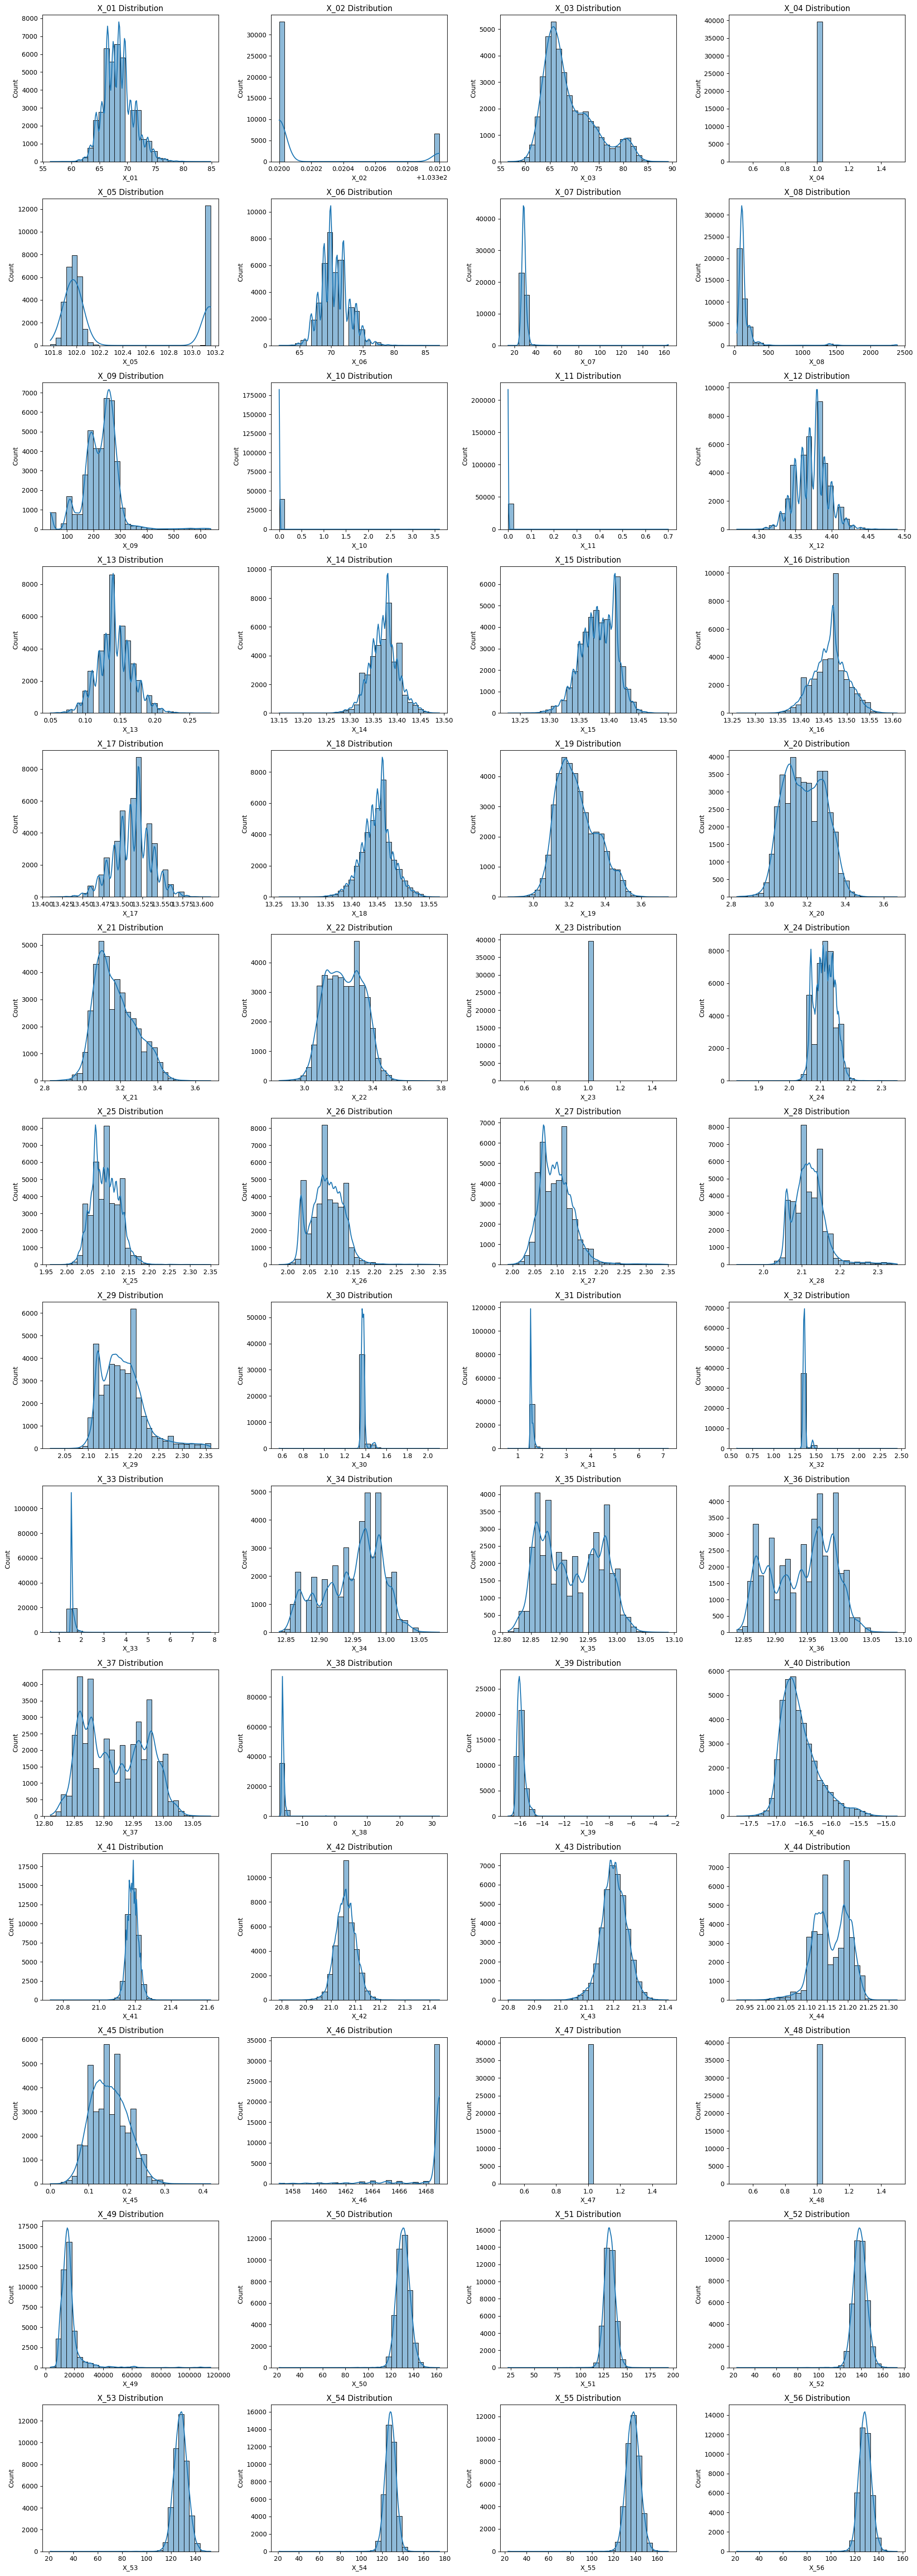

In [ ]:
# ✅ X 변수 분포 시각화

# X 컬럼만 분리
x_cols = [col for col in train_df.columns if 'X_' in col]

# === X 변수란? ===
# 이 대회의 X_01 ~ X_56 변수들은
# 공정 데이터, 센서 데이터, 장비 상태 등
# 비식별화된 수치형 입력값입니다.
# 예: 압력, 온도, 위치, 속도, 전류 등일 가능성이 있음 (실제 변수 설명은 meta 파일 참조)

# 전체 X 변수 분포 확인
num_cols = len(x_cols)
num_rows = (num_cols + 3) // 4  # 4개씩 한 줄에, 필요한 행 계산

plt.figure(figsize=(20, num_rows * 4))

for i, col in enumerate(x_cols):
    plt.subplot(num_rows, 4, i + 1)
    sns.histplot(train_df[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()
# === 추가 설명 ===
# 나머지 X 변수들은 범주로 나눠서 볼 수도 있음
# 예: X_01~X_20 → 기본 센서값
#     X_21~X_40 → 공정 제어값
#     X_41~X_56 → 기타 파생값 (예시 범주)
# 정확한 범주는 meta/x_feature_info.csv 참고


# X 범주별로 시각화 (박스플롯으로 만들기)

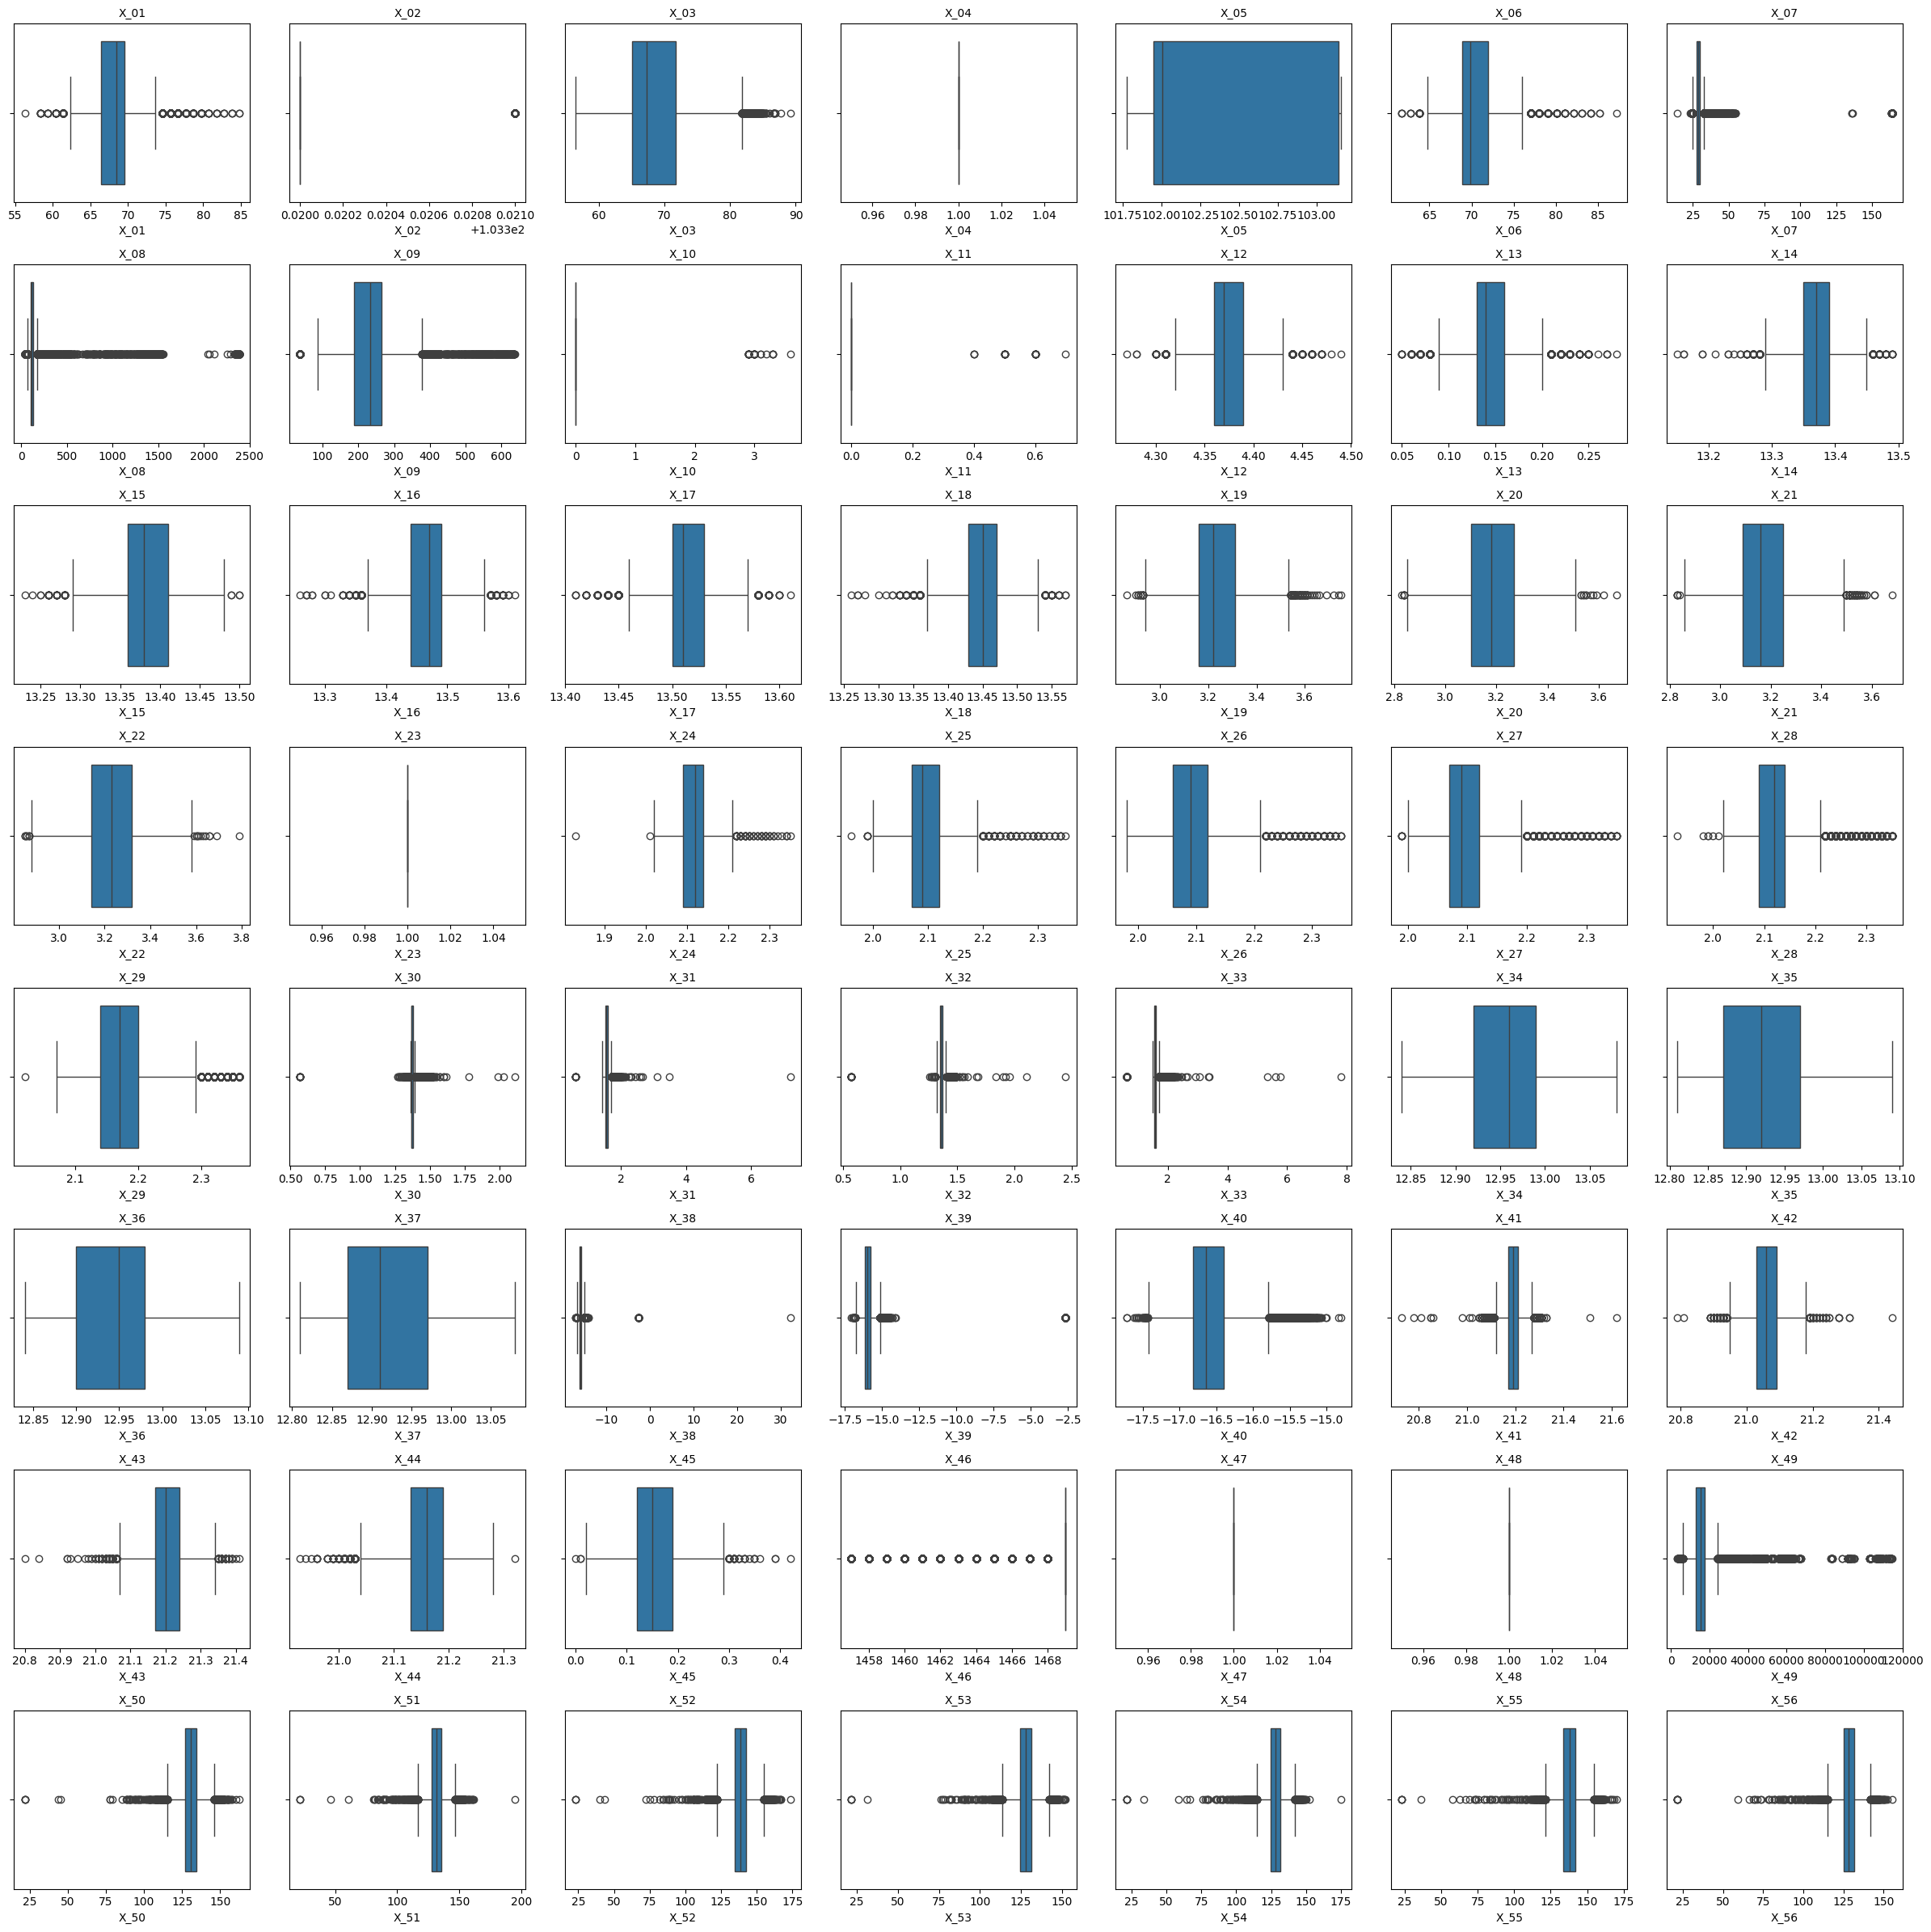

In [ ]:
###이상치 boxplot 추가(최하연)
# X 변수 리스트
x_cols = [col for col in train_df.columns if 'X_' in col]

# 설정: 한 줄에 4개씩 출력
cols_per_row = 7
num_cols = len(x_cols)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(24, num_rows * 3))  # 그래프 크기 조정

for i, col in enumerate(x_cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(x=train_df[col], orient='h')
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

PCB Press 시각화

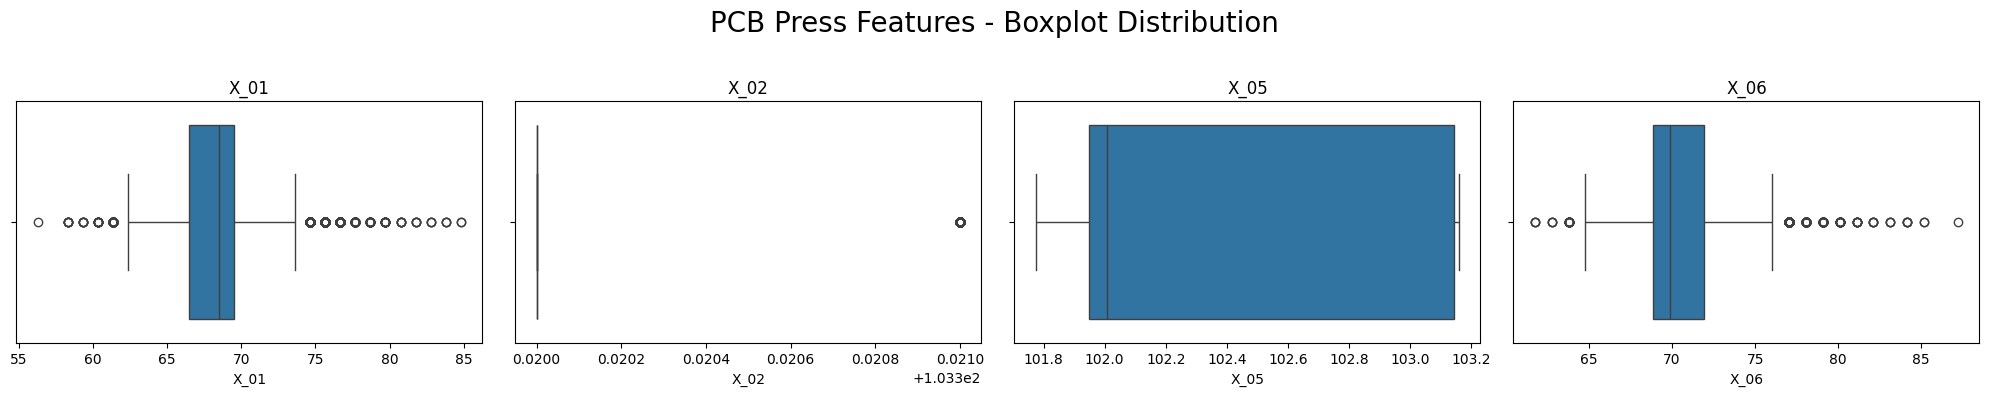

In [ ]:
# PCB Press 그룹 변수 리스트
# PCB 체결 시 단계별 누름량
pcb_press_features = ['X_01', 'X_02', 'X_05', 'X_06']  # 순서대로 step 1~4

num_cols = len(pcb_press_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('PCB Press Features - Boxplot Distribution', fontsize=20)

for i, col in enumerate(pcb_press_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

###방열재료 무게 시각화

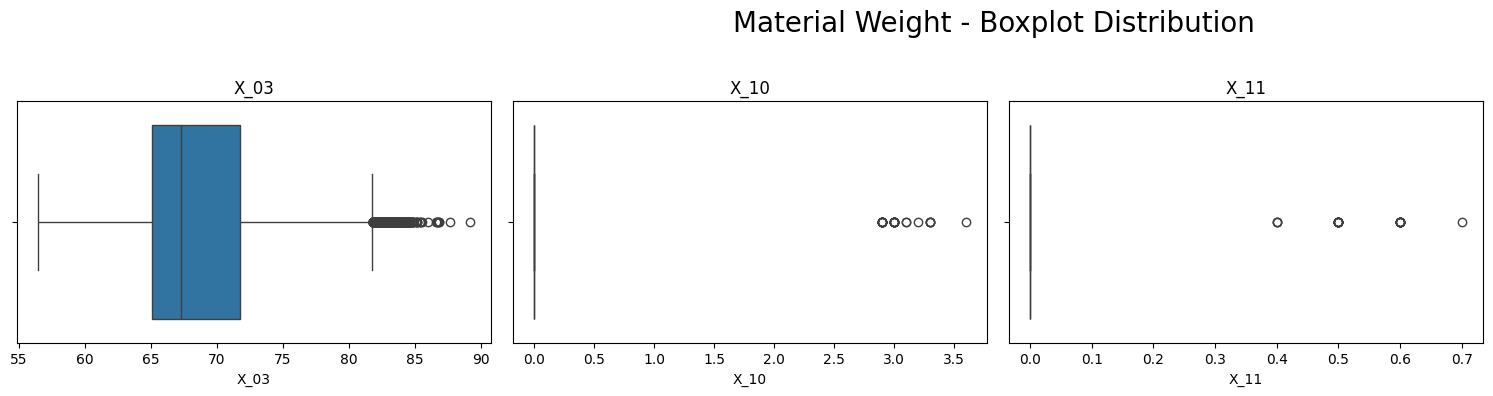

In [ ]:
# 방열재료 무게 시각화 (박스플롯)
# 순서대로 재료1~3 무게
material_features = ['X_03', 'X_10', 'X_11']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Material Weight - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###방열재료 면적 시각화

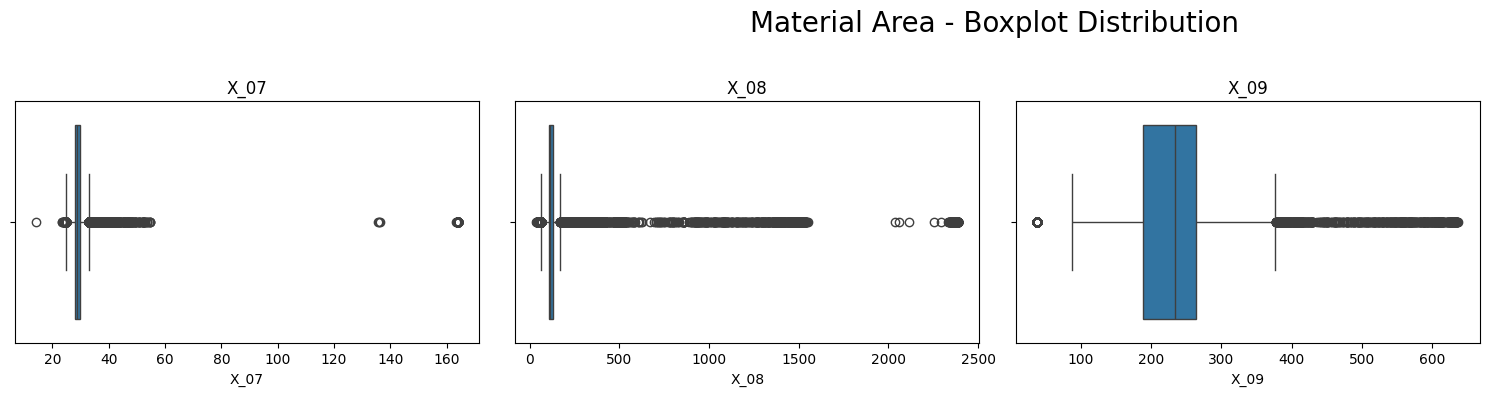

In [ ]:
# 방열재료 면적 시각화 (박스플롯)
# 순서대로 재료1~3 면적
material_features = ['X_07', 'X_08', 'X_09']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Material Area - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###검사 통과 여부 시각화

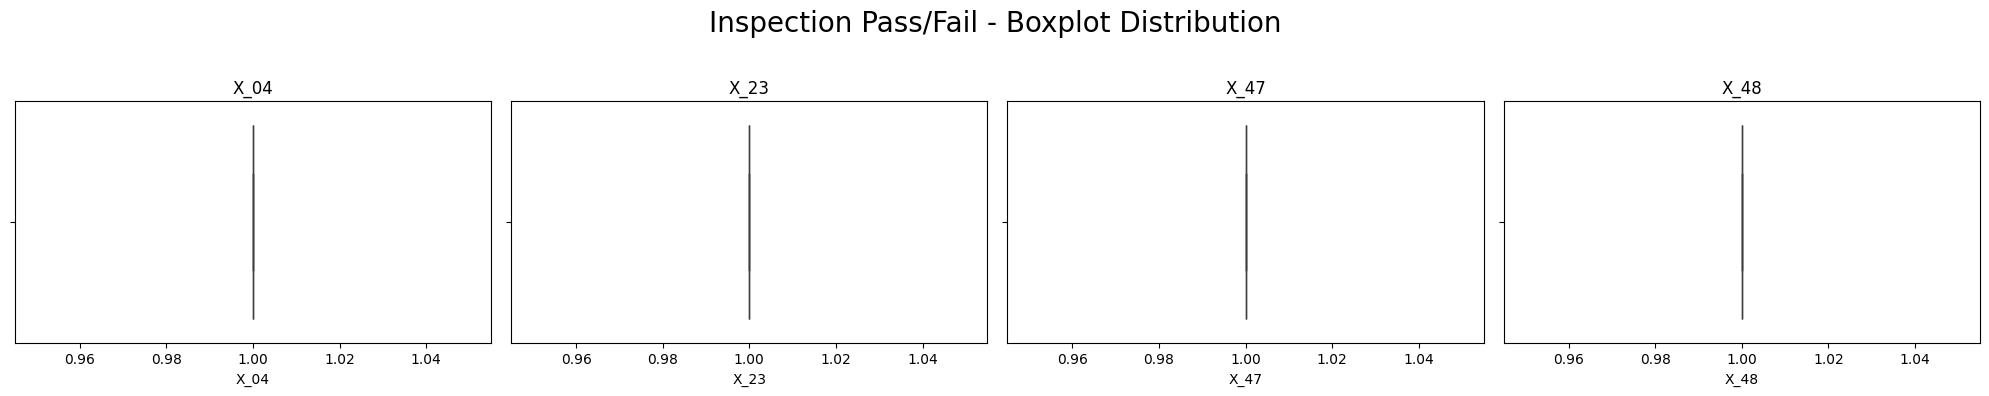

In [ ]:
# 검사 통과 여부 시각화 (박스플롯)
# 순서대로 1차~4차 검사 결과
material_features = ['X_04', 'X_23', 'X_47', 'X_48']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Inspection Pass/Fail - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###안테나 패드 위치 시각화

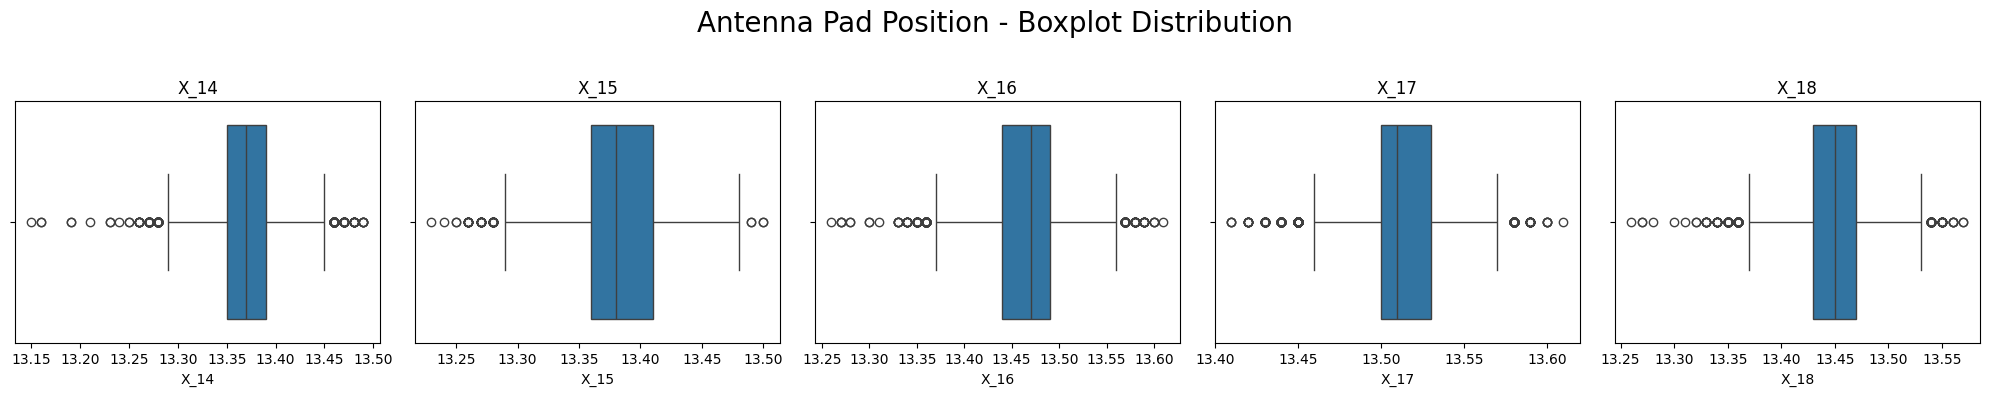

In [ ]:
# 안테나 패드 위치 시각화 (박스플롯)
# 순서대로 1번~5번 패드
material_features = ['X_14', 'X_15', 'X_16', 'X_17', 'X_18']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 5  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Antenna Pad Position - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 5, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###스크류 삽입 깊이 시각화

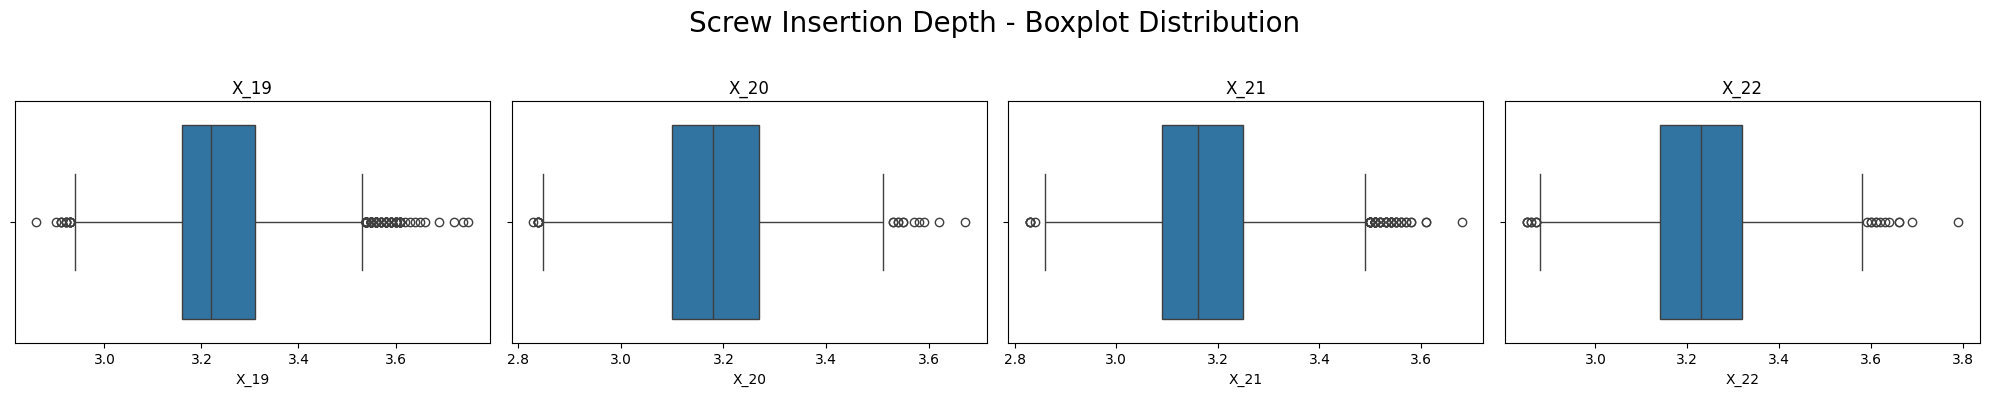

In [ ]:
# 스크류 삽입 깊이 시각화 (박스플롯)
# 순서대로 1번~4번 스크류
material_features = ['X_19', 'X_20', 'X_21', 'X_22']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Screw Insertion Depth - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


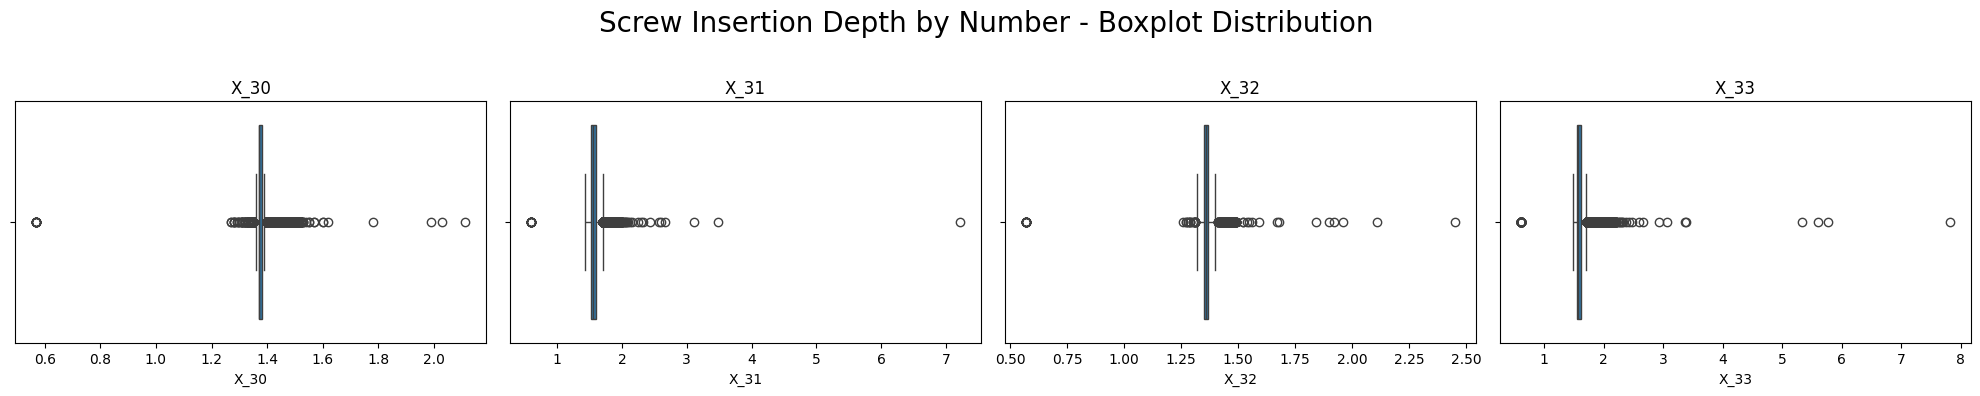

In [ ]:
# 스크류 삽입 깊이 시각화 (번호당) - 박스플롯
# 순서대로 1~4번
material_features = ['X_30', 'X_31', 'X_32', 'X_33']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Screw Insertion Depth by Number - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###커넥터 핀 치수 시각화

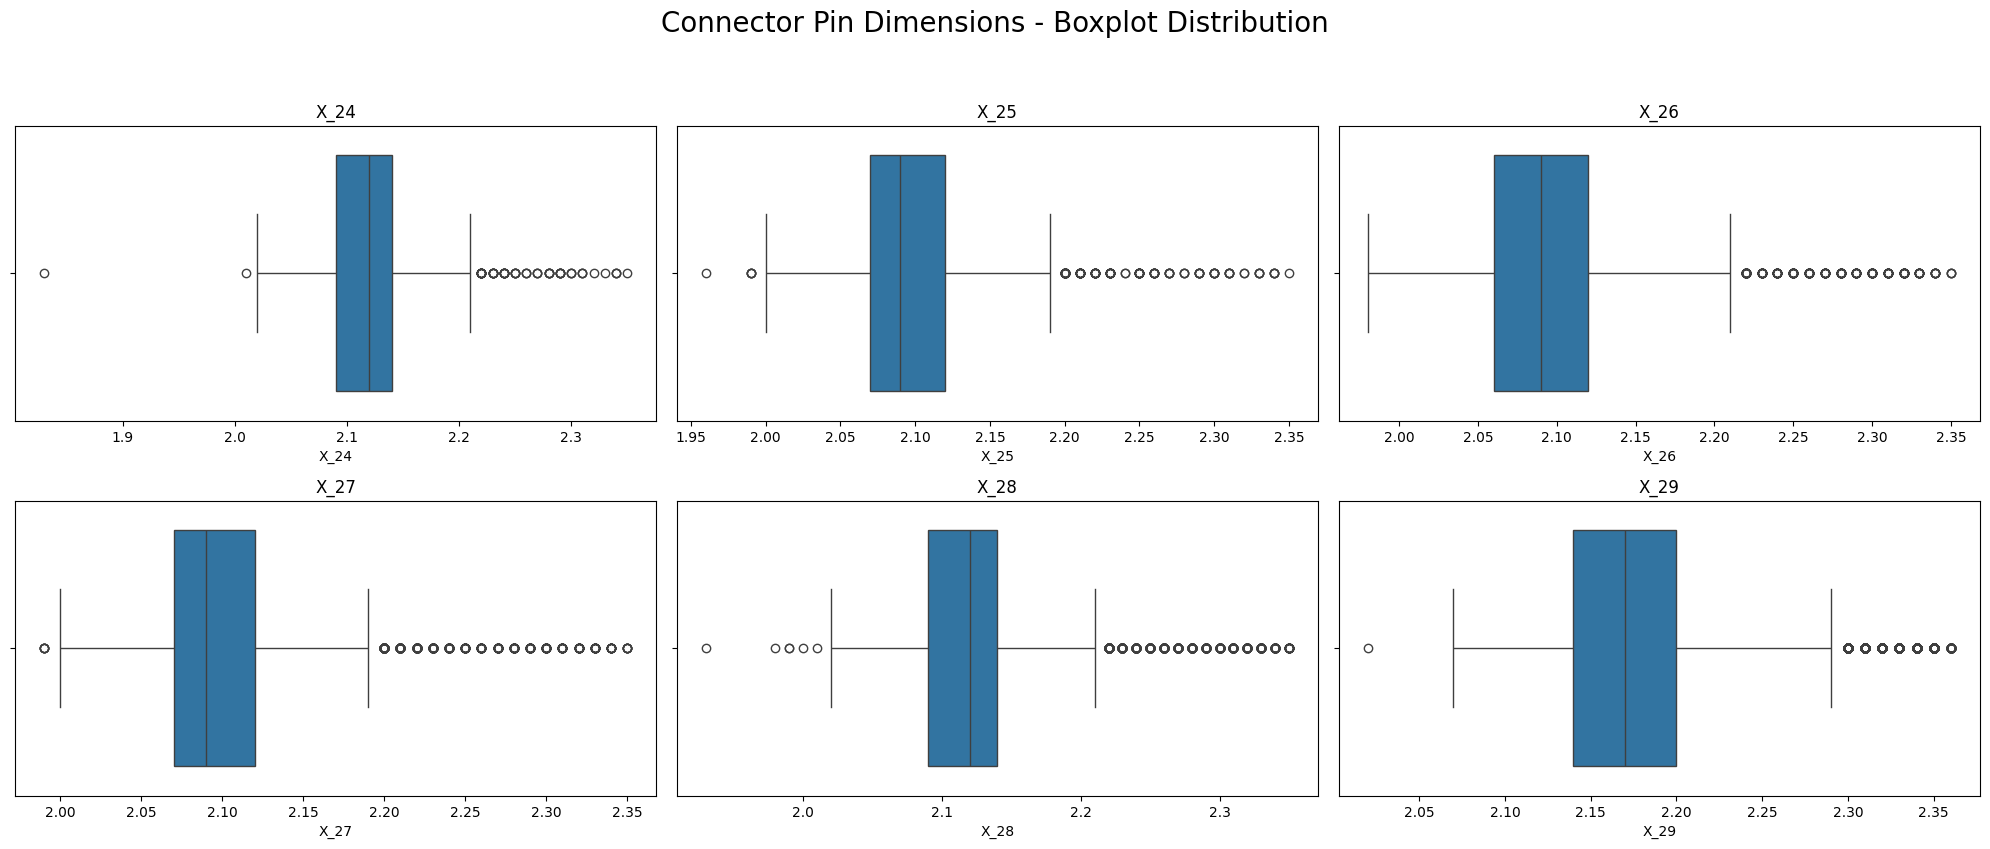

In [ ]:
# 커넥터 핀 치수 시각화 (박스플롯)
# 순서대로 1번~6번
material_features = ['X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 3  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Connector Pin Dimensions - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###하우징 PCB 안착부 치수 시각화

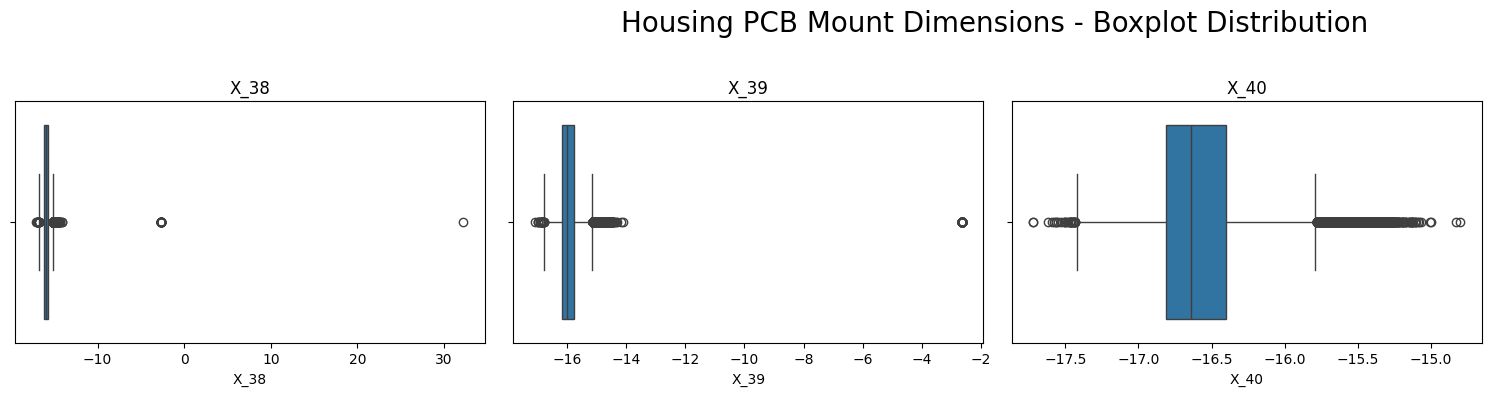

In [ ]:
# 하우징 PCB 안착부 치수 시각화 (박스플롯)
# 순서대로 1~3번
material_features = ['X_38', 'X_39', 'X_40']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Housing PCB Mount Dimensions - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###레이돔 치수 시각화

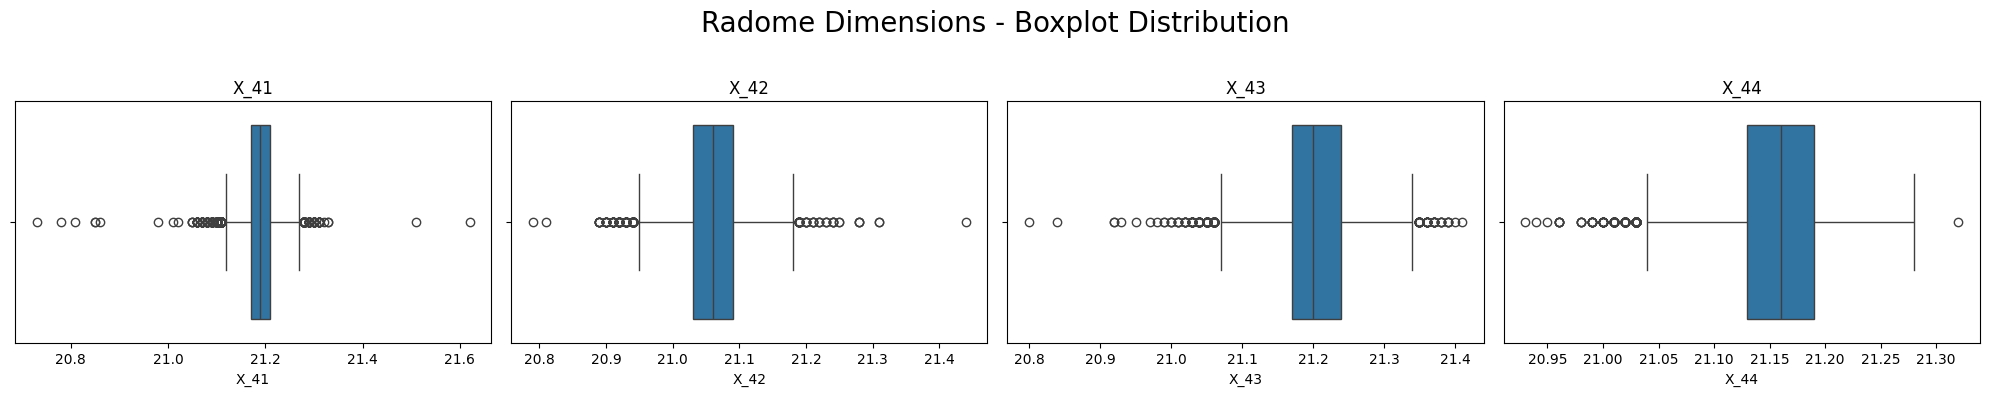

In [ ]:
# 레이돔 치수 시각화 (박스플롯)
# 순서대로 안테나 1번 부위 ~ 4번 부위
material_features = ['X_41', 'X_42', 'X_43', 'X_44']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Radome Dimensions - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###RFn 부분 SMT 납 량 시각화

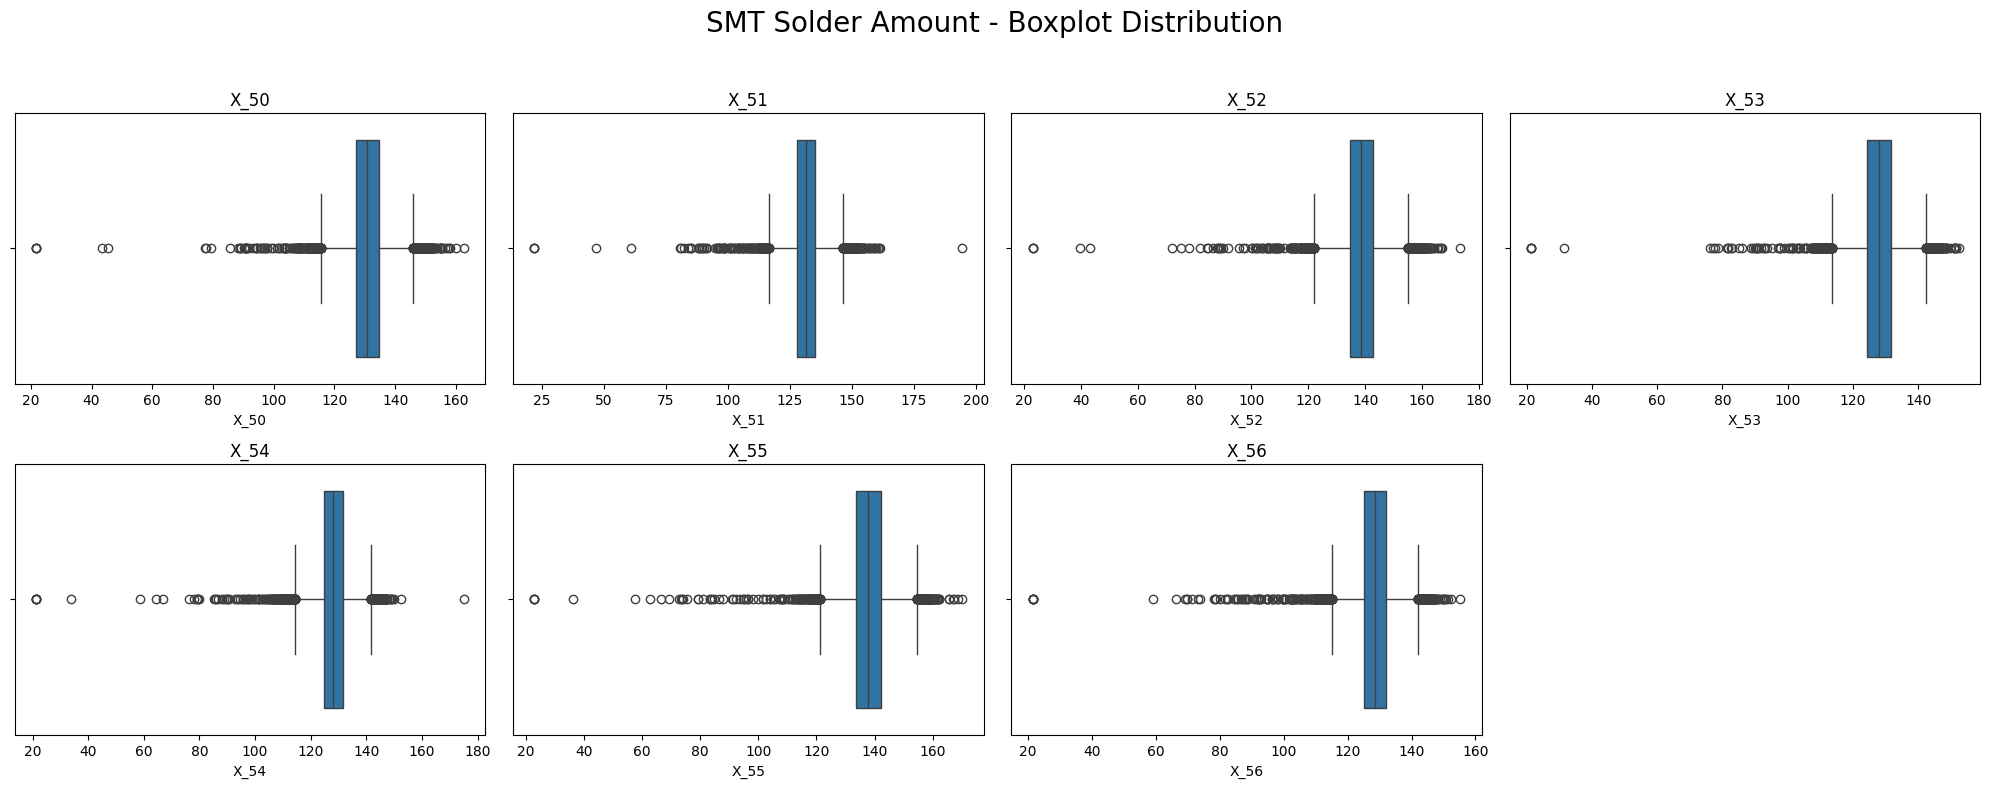

In [ ]:
# SMT 납 량 시각화 (박스플롯)
# 순서대로 RF1~RF7
material_features = ['X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 4  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('SMT Solder Amount - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 4, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


###그룹 없는거 시각화

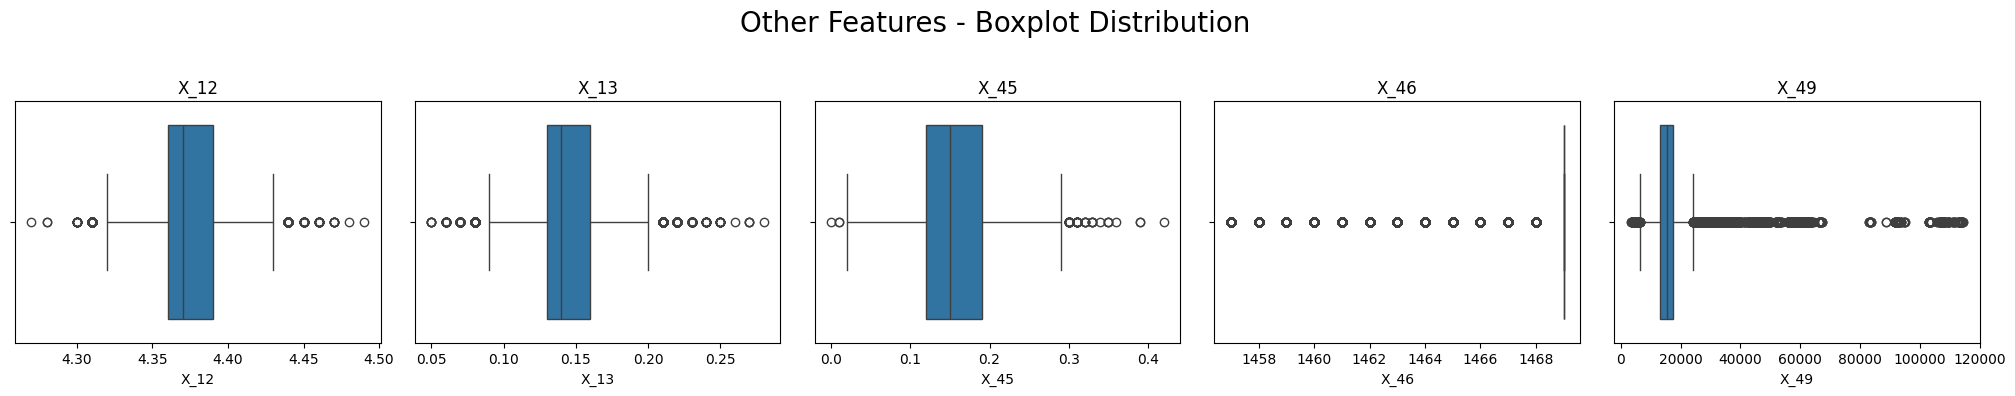

In [ ]:
# 기타 항목 시각화 (박스플롯)
# 순서대로 커넥터 위치 기준 좌표, 각 안테나 패드 위치(높이)차이,
# 안테나부분 레이돔 기울기, 실란트 본드 소요량, Cal 추입 전 대기 시간
material_features = ['X_12', 'X_13', 'X_45', 'X_46', 'X_49']

num_cols = len(material_features)
num_rows = (num_cols + 3) // 5  # 한 줄에 4개씩 배치

plt.figure(figsize=(20, num_rows * 4))
plt.suptitle('Other Features - Boxplot Distribution', fontsize=20)

for i, col in enumerate(material_features):
    if col in train_df.columns:
        plt.subplot(num_rows, 5, i + 1)
        sns.boxplot(x=train_df[col], orient='h')
        plt.title(f'{col}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#Y 시각화

Y변수 시각화 좋음-> 비중을 조금 두면 좋음. Y 분석이랑 개별 Y별로 X영향 받는거 랑 연관지어서 발표하면 좋음

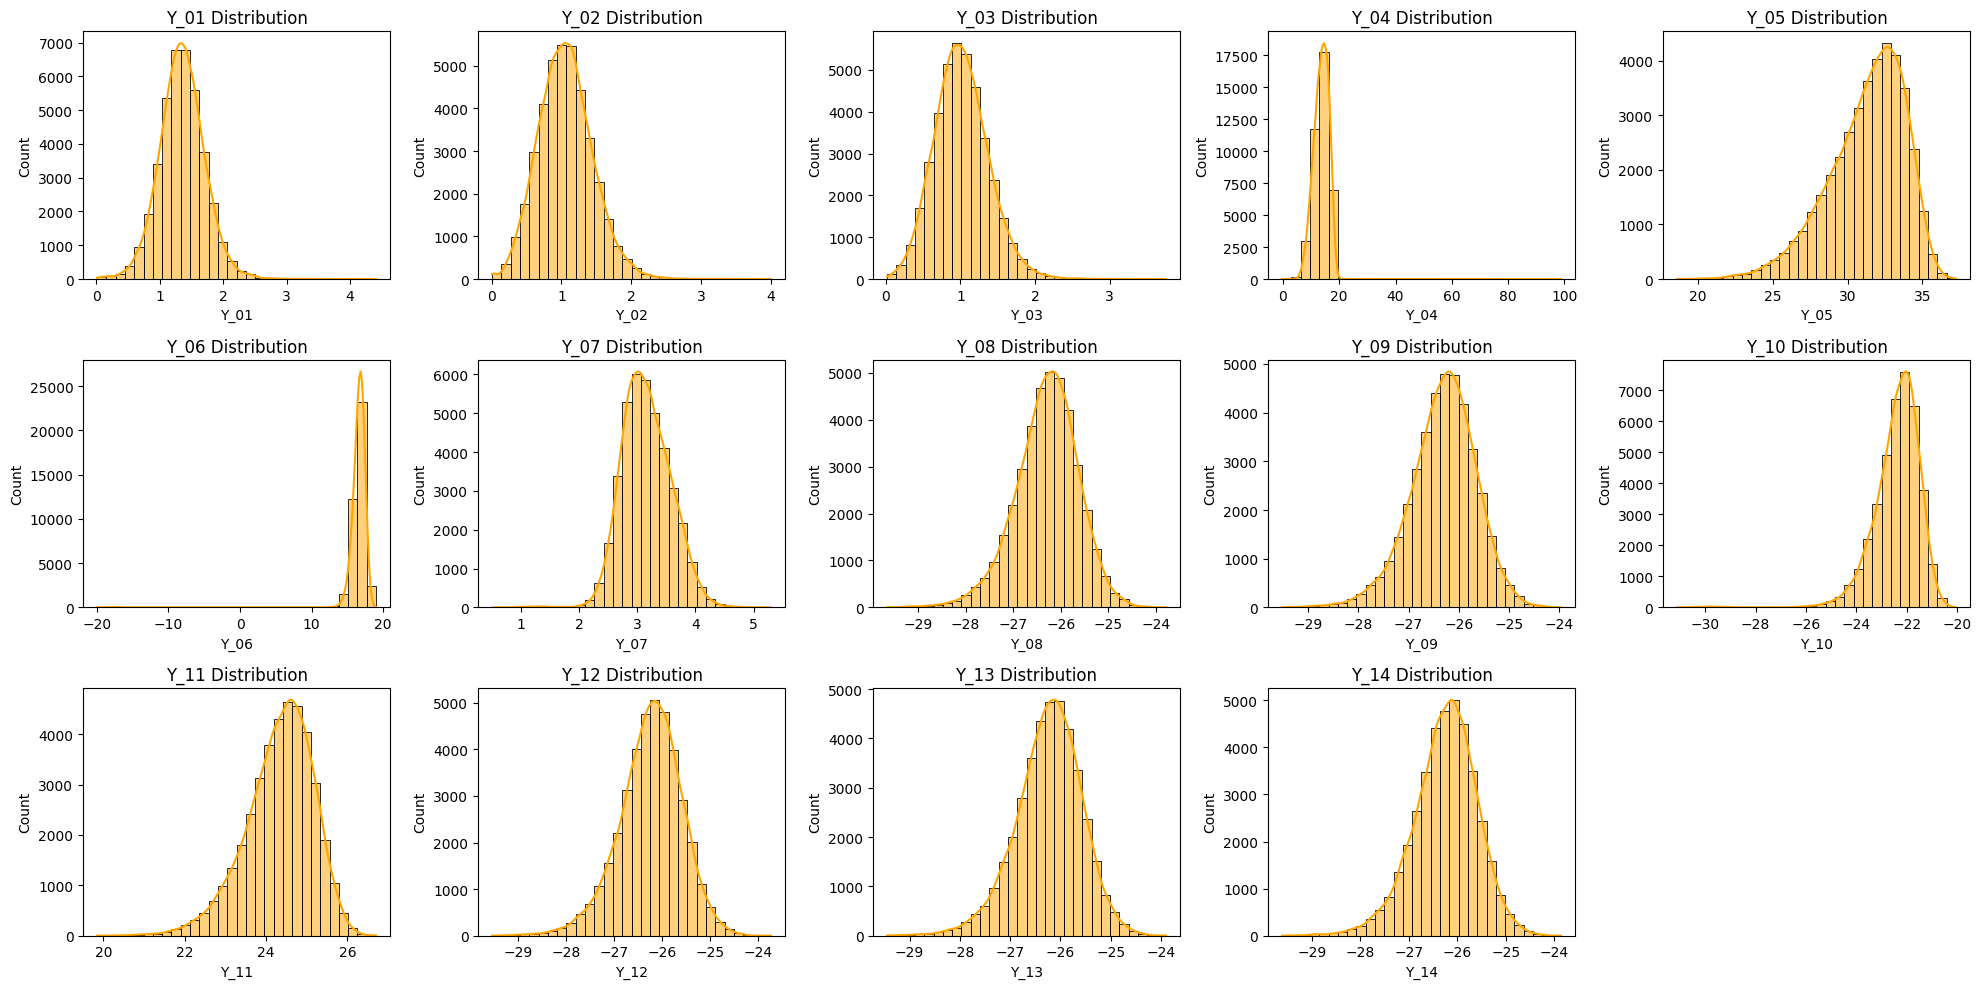

In [ ]:
# ✅ Y 변수 분포 시각화

# Y 컬럼만 분리
y_cols = [col for col in train_df.columns if 'Y_' in col]

# === Y 변수란? ===
# 이 대회의 Y_01 ~ Y_14 변수들은
# Radar 센서 안테나의 성능 지표로,
# 각 안테나의 전기적·물리적 성능을 나타내는 수치입니다.
# 예: 출력 강도, 반사율, 신호 대 잡음비(SNR), 응답 속도 등
# 정확한 의미는 meta/y_feature_info.csv 참고

# Y 변수 전체 분포 확인
plt.figure(figsize=(20, 10))
for i, col in enumerate(y_cols):
    plt.subplot(3, 5, i + 1)
    sns.histplot(train_df[col], bins=30, kde=True, color='orange')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


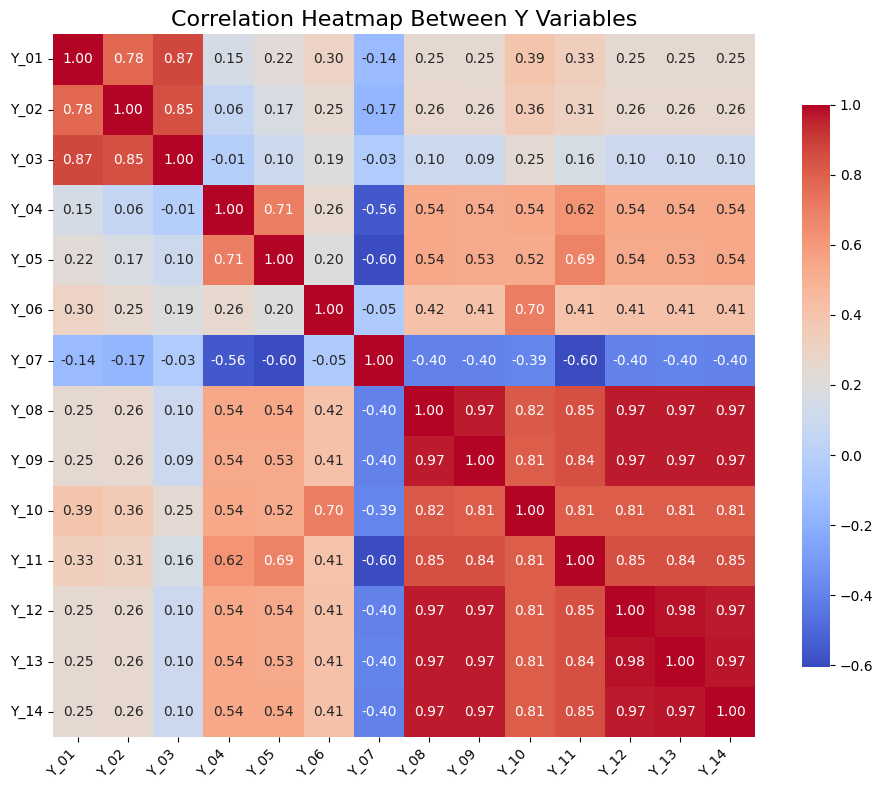

In [ ]:
#Y간 상관관계를 히트맵으로 표현 숫자가 높고 빨간색일 수록 관계가 높음
#이 정보는 아직 어디에 써야할지는 아직 모름

# Y 컬럼만 분리
y_cols = [col for col in train_df.columns if col.startswith('Y_')]
y_data = train_df[y_cols]

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(
    y_data.corr(),
    annot=True,           # 상관계수 숫자 표시
    fmt=".2f",            # 소수점 두 자리
    cmap='coolwarm',      # 색상 팔레트
    square=True,          # 정사각형 셀
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap Between Y Variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#전체 시각화

의미 찾기

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:292

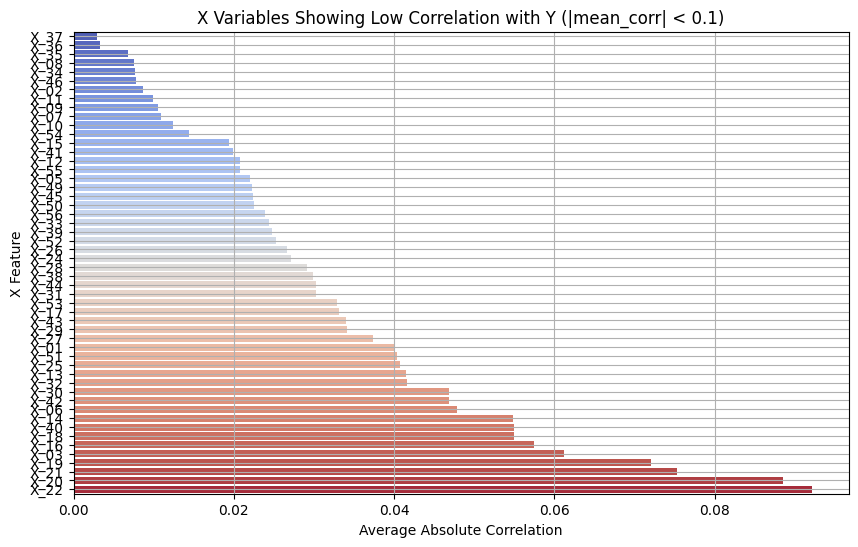

In [ ]:
#어떤 X 변수들이 Y 예측에 거의 쓸모 없을 가능성이 높은지
#→ feature selection(변수 선택) 단계에서 참고할 수 있는 자료예요.
#이 플롯에서 파란색 쪽 변수들(= Y와 상관 거의 없음)은 제거 후보.
#빨간색 쪽(= 상대적으로 약간 상관 있음)은 유지하거나 추가 실험 대상으로 고려.

x_cols = [col for col in train_df.columns if col.startswith('X_')]
y_cols = [col for col in train_df.columns if col.startswith('Y_')]

# X-Y 상관계수 행렬 만들기
correlation_matrix = pd.DataFrame(index=x_cols, columns=y_cols)

for y in y_cols:
    correlation_matrix[y] = train_df[x_cols].corrwith(train_df[y])

correlation_matrix['mean_corr'] = correlation_matrix.abs().mean(axis=1)

low_corr_features = correlation_matrix[correlation_matrix['mean_corr'] < 0.1].sort_values('mean_corr')

plt.figure(figsize=(10, 6))
sns.barplot(x=low_corr_features['mean_corr'], y=low_corr_features.index, palette='coolwarm')
plt.title('X Variables Showing Low Correlation with Y (|mean_corr| < 0.1)')
plt.xlabel('Average Absolute Correlation')
plt.ylabel('X Feature')
plt.grid(True)
plt.show()
sns.set(style='white', font_scale=1.5)



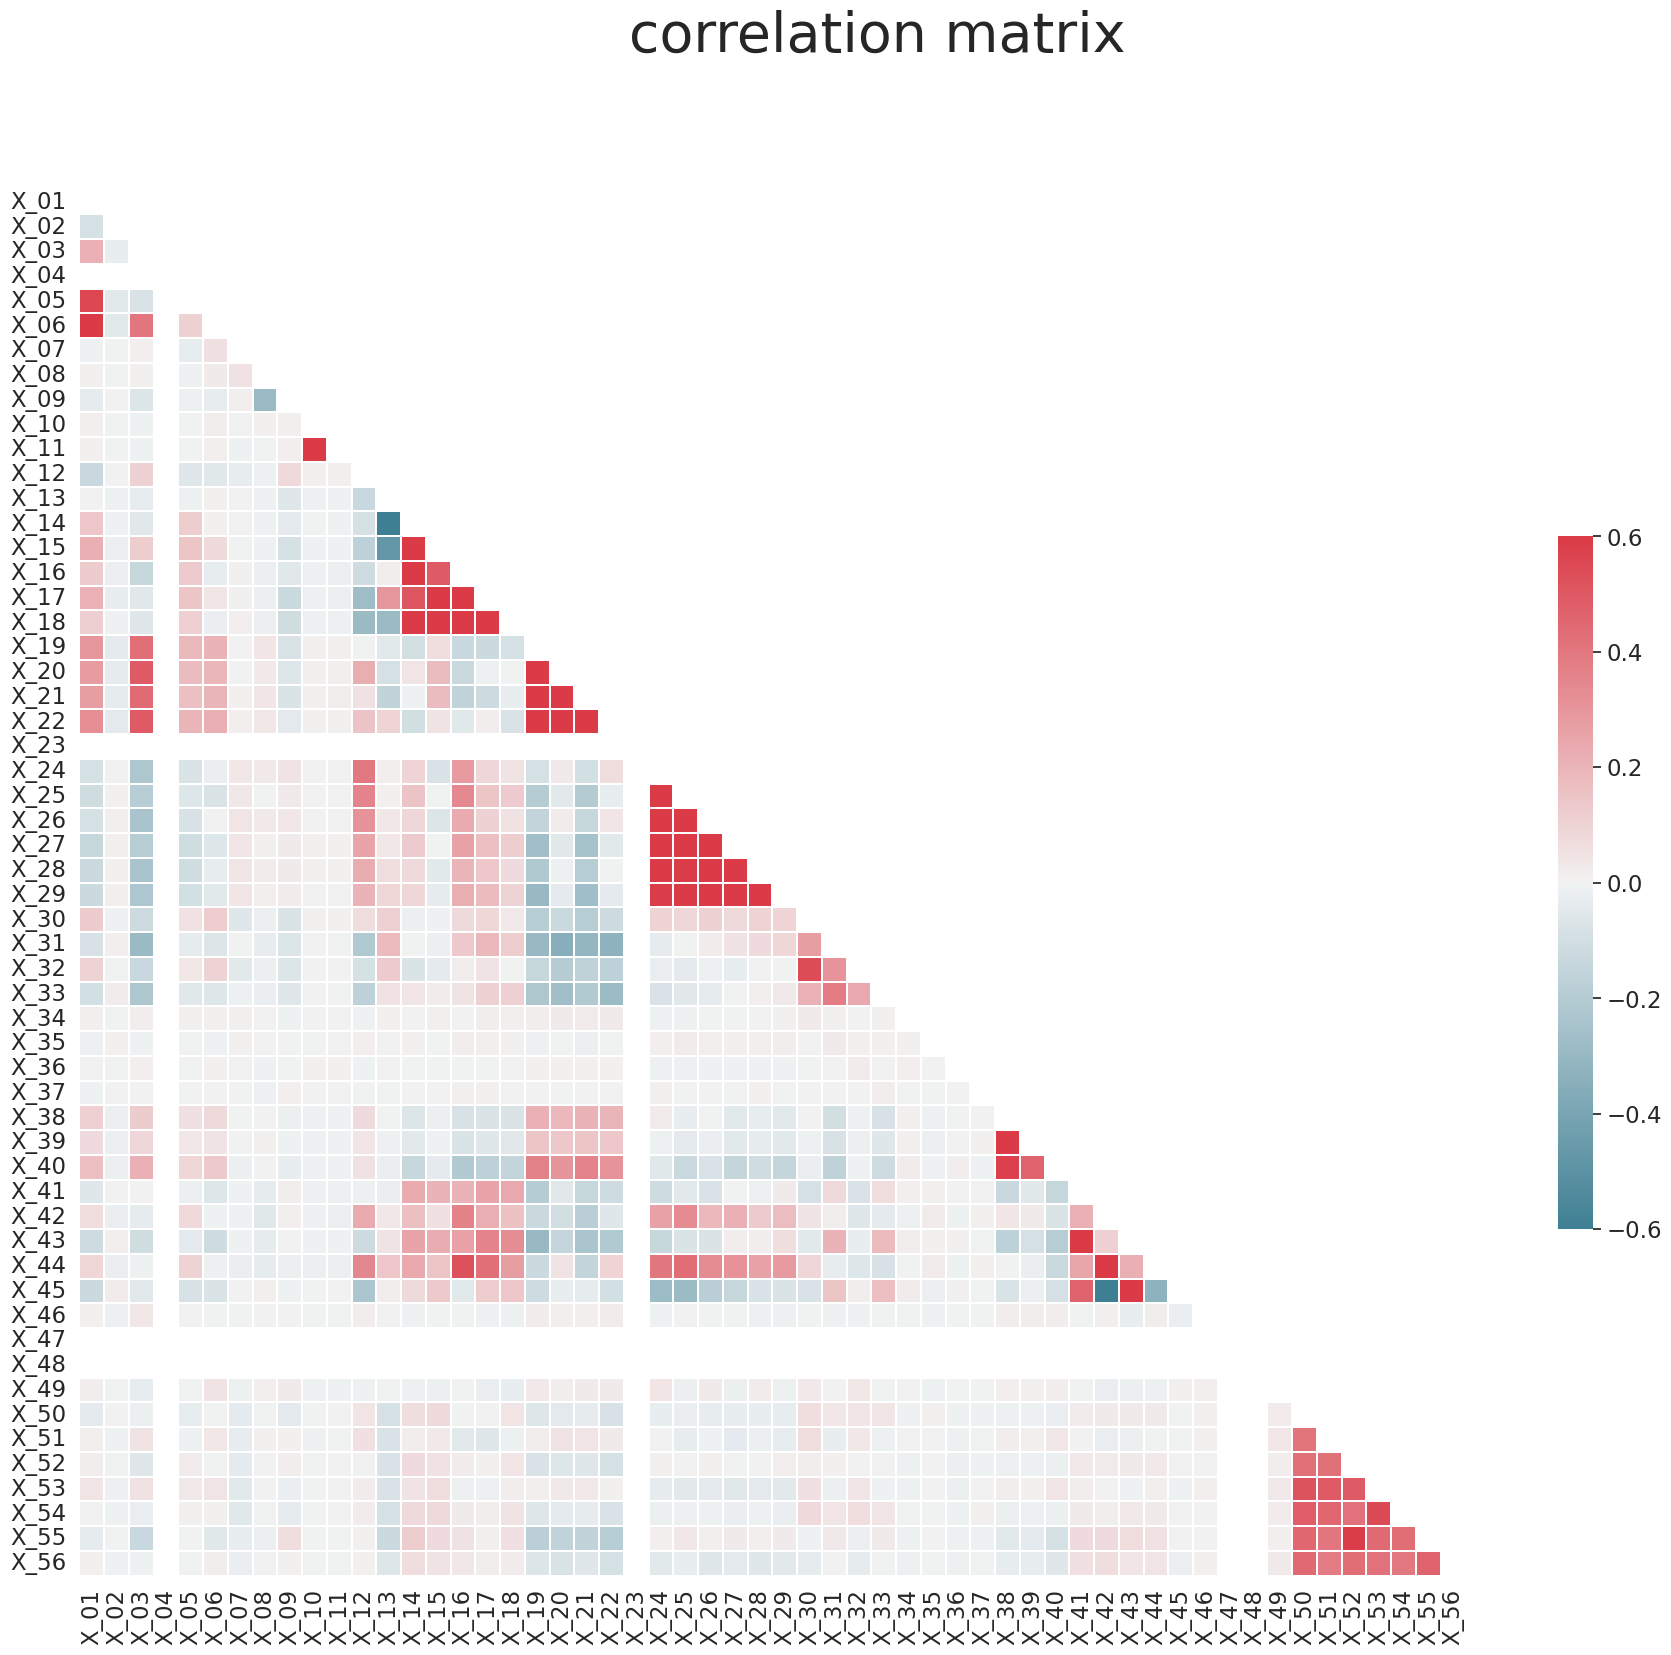

In [ ]:
corr = train_df.drop(['Y_01', 'Y_02', 'Y_03', 'Y_04', 'Y_05', 'Y_06', 'Y_07', 'Y_08', 'Y_09',
                     'Y_10', 'Y_11', 'Y_12', 'Y_13', 'Y_14'], axis=1)

# 숫자형 컬럼만 선택해서 상관계수 계산
corr = corr.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #대각선을 기준으로 아래를 보자.

f,ax=plt.subplots(figsize=(24,18))
f.suptitle('correlation matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmax=.6,vmin=-.6,center=0,cmap=cmap,
           square=True,linewidth=.2,cbar_kws={'shrink':.5},annot=False);

#전처리 준비

##SHAP 처리

shap라이브러리 쓴거 시각화 하기-> 공통적으로 영향 준 변수랑 그런거 시각화 하기. 이 변수가 어떤 변수인지 안이까 그 중에서도 공통적으로 y에 영향 미친 x가 뭔지 아니까 정말 그런가? 하는 근거자료 찾기.
공정 데이터 논문같은거 찾아보고 진짜 그런가에 대한 근거 찾기

###shap 통합 계산(shap계산 너무 오래걸려서 그냥 하나로 통합함)

In [ ]:

# 컬럼 분리
x_cols = [col for col in train_df.columns if col.startswith('X_')]
y_cols = [col for col in train_df.columns if col.startswith('Y_')]

X = train_df[x_cols]
Y = train_df[y_cols]

# 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 결과 저장용
all_shap_importance = pd.DataFrame({'feature': x_cols})
shap_summary = pd.DataFrame(index=x_cols)

for y_col in y_cols:
    print(f"\n===== Processing {y_col} =====")
    y = Y[y_col]

    # 학습/검증 데이터 분리
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # 모델 학습
    model = LGBMRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # SHAP 계산
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_val)

    if isinstance(shap_values, list):  # 분류 문제 대응
        shap_values = shap_values[0]

    mean_shap = np.abs(shap_values).mean(axis=0)

    # 저장
    all_shap_importance[y_col + '_mean_abs_shap'] = mean_shap
    shap_summary[y_col] = mean_shap

print("\n✅ SHAP 계산 완료 (두 포맷 모두 저장됨)")



===== Processing Y_01 =====
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5217
[LightGBM] [Info] Number of data points in the train set: 31685, number of used features: 51
[LightGBM] [Info] Start training from score 1.350903

===== Processing Y_02 =====
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5217
[LightGBM] [Info] Number of data points in the train set: 31685, number of used features: 51
[LightGBM] [Info] Start training from score 1.055166

===== Processing Y_03 =====
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Li

###모든 X가 각 Y에 대해 얼마나 중요한지를 한눈에 보여주는 히트맵

####히트맵

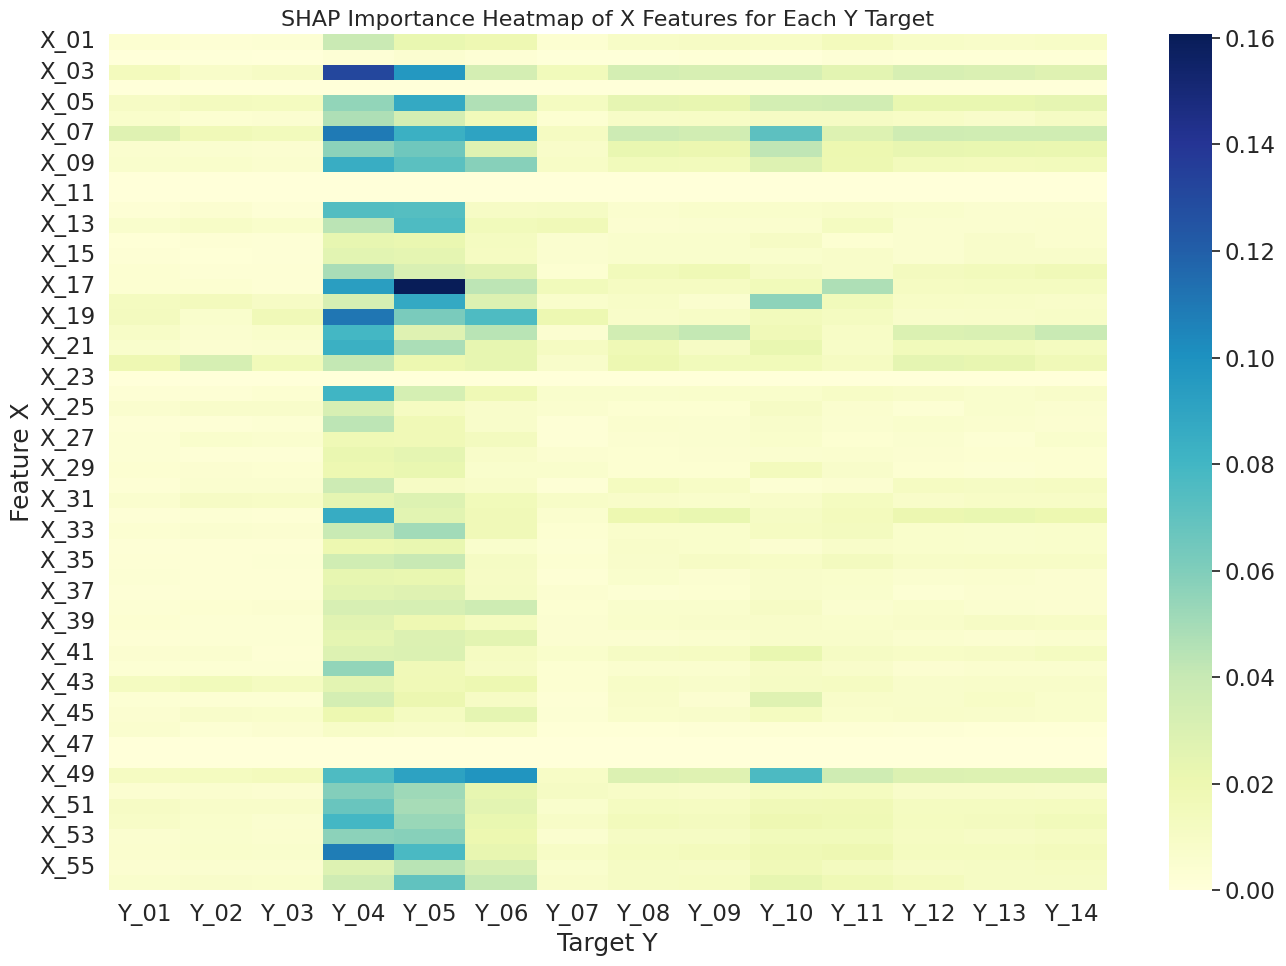

In [ ]:
# SHAP Importance Heatmap 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(shap_summary, cmap='YlGnBu')
plt.title("SHAP Importance Heatmap of X Features for Each Y Target", fontsize=16)
plt.xlabel("Target Y")
plt.ylabel("Feature X")
plt.tight_layout()
plt.show()


###모든 Y에 공통으로 영향 높은 변수리스트

###Y를 예측하는데 가장 중요한 X 변수 5개 추출

In [ ]:
# Y별로 SHAP 중요도 상위 5개 X feature 이름 추출
top5_feature_names = pd.DataFrame()

for y in shap_summary.columns:  # 예: Y_01 ~ Y_14
    top5_vars = shap_summary[y].sort_values(ascending=False).head(5).index.tolist()
    top5_feature_names[y] = top5_vars

# 보기 좋게 행 이름 정리 (Top1 ~ Top5)
top5_feature_names.index = [f'Top{i+1}' for i in range(5)]

# 결과 출력
display(top5_feature_names)


,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
Top1,X_07,X_22,X_19,X_03,X_17,X_49,X_19,X_07,X_20,X_49,X_17,X_07,X_07,X_20
Top2,X_22,X_07,X_22,X_19,X_03,X_07,X_13,X_20,X_07,X_07,X_49,X_03,X_20,X_07
Top3,X_03,X_43,X_07,X_07,X_49,X_19,X_17,X_03,X_03,X_18,X_05,X_20,X_03,X_49
Top4,X_19,X_18,X_49,X_54,X_05,X_09,X_03,X_49,X_49,X_08,X_07,X_49,X_49,X_03
Top5,X_18,X_05,X_05,X_17,X_18,X_05,X_05,X_05,X_05,X_05,X_03,X_22,X_22,X_05


In [ ]:
# 1. 변수별로 영향을 준 Y 리스트 매핑
x_to_y_mapping = defaultdict(list)

for y in top5_feature_names.columns:  # Y_01 ~ Y_nn
    for x in top5_feature_names[y]:   # 각 Y에서 상위 5개 X
        x_to_y_mapping[x].append(y)   # X → 영향 준 Y 등록

# 2. X별로 등장 횟수(즉, 여러 Y에서 반복적으로 등장했는지) 기준 정렬
x_common_sorted = sorted(
    x_to_y_mapping.items(), key=lambda item: len(item[1]), reverse=True
)

# 3. 결과 표로 변환 (2개 이상의 Y에 등장한 X만 필터링)
x_common_df = pd.DataFrame([
    {
        'X 변수': x,
        '등장 횟수': len(ys),
        '영향 준 Y 목록': ', '.join(ys)
    }
    for x, ys in x_common_sorted if len(ys) > 1
])

# 4. 결과 출력
display(x_common_df)

,X 변수,등장 횟수,영향 준 Y 목록
0,X_07,12,"Y_01, Y_02, Y_03, Y_04, Y_06, Y_08, Y_09, Y_10..."
1,X_03,10,"Y_01, Y_04, Y_05, Y_07, Y_08, Y_09, Y_11, Y_12..."
2,X_05,10,"Y_02, Y_03, Y_05, Y_06, Y_07, Y_08, Y_09, Y_10..."
3,X_49,10,"Y_03, Y_05, Y_06, Y_08, Y_09, Y_10, Y_11, Y_12..."
4,X_22,5,"Y_01, Y_02, Y_03, Y_12, Y_13"
5,X_19,5,"Y_01, Y_03, Y_04, Y_06, Y_07"
6,X_20,5,"Y_08, Y_09, Y_12, Y_13, Y_14"
7,X_18,4,"Y_01, Y_02, Y_05, Y_10"
8,X_17,4,"Y_04, Y_05, Y_07, Y_11"


###전반적으로 중요한 X변수, 중요하지 않은 X변수 파악

In [ ]:

# 각 X feature의 전체 평균 중요도 (모든 Y 평균)
all_shap_importance['mean_shap_across_Y'] = all_shap_importance[
    [col for col in all_shap_importance.columns if col.endswith('_mean_abs_shap')]
].mean(axis=1)

# 중요도 순 정렬
all_shap_sorted = all_shap_importance.sort_values('mean_shap_across_Y', ascending=False)

'''print("\n=== Top Important Features (전체 평균 기준) ===")
print(all_shap_sorted.head(10))

print("\n=== Least Important Features (전체 평균 기준) ===")
print(all_shap_sorted.tail(10))'''
print("🔝 Top 10 Most Important Features (Average Across Y):")
display(all_shap_sorted.head(10))

# 하위 10개 중요 변수 표로 출력
print("🔻 Least 10 Important Features (Average Across Y):")
display(all_shap_sorted.tail(10))


🔝 Top 10 Most Important Features (Average Across Y):


,feature,Y_01_mean_abs_shap,Y_02_mean_abs_shap,Y_03_mean_abs_shap,Y_04_mean_abs_shap,Y_05_mean_abs_shap,Y_06_mean_abs_shap,Y_07_mean_abs_shap,Y_08_mean_abs_shap,Y_09_mean_abs_shap,Y_10_mean_abs_shap,Y_11_mean_abs_shap,Y_12_mean_abs_shap,Y_13_mean_abs_shap,Y_14_mean_abs_shap,mean_shap_across_Y
6,X_07,0.028184,0.016925,0.014461,0.109298,0.083777,0.090525,0.011794,0.037240,0.034579,0.070937,0.028370,0.035941,0.035451,0.035290,0.045198
48,X_49,0.011477,0.012904,0.014156,0.076097,0.091454,0.097937,0.010033,0.028987,0.028038,0.076880,0.036243,0.029104,0.028549,0.028739,0.040757
2,X_03,0.013965,0.008579,0.010366,0.131686,0.096493,0.033820,0.015232,0.033330,0.031877,0.032626,0.025656,0.031767,0.030749,0.027947,0.037435
16,X_17,0.003945,0.004037,0.003107,0.093415,0.160663,0.043049,0.015471,0.011814,0.011700,0.016235,0.047264,0.011361,0.012134,0.012128,0.031880
4,X_05,0.010498,0.013433,0.012658,0.055207,0.087723,0.046677,0.011950,0.024057,0.022746,0.034011,0.034992,0.022333,0.022200,0.024299,0.030199
19,X_20,0.008897,0.005554,0.007361,0.079503,0.027860,0.044334,0.004550,0.034965,0.040802,0.016520,0.009950,0.029720,0.031059,0.039389,0.027176
18,X_19,0.013796,0.006375,0.016807,0.110987,0.062083,0.076016,0.020037,0.008579,0.009779,0.014798,0.012373,0.008069,0.008163,0.008896,0.026911
8,X_09,0.006513,0.007376,0.005983,0.085080,0.071981,0.058346,0.009464,0.015167,0.014992,0.028772,0.019751,0.014775,0.014320,0.014969,0.026249
7,X_08,0.006230,0.005555,0.004933,0.056740,0.065827,0.027893,0.008412,0.022044,0.021118,0.042202,0.020094,0.022874,0.022153,0.021586,0.024833
53,X_54,0.005867,0.007116,0.006508,0.108091,0.077657,0.022845,0.009683,0.012875,0.014217,0.017739,0.019096,0.012633,0.013148,0.014307,0.024413


🔻 Least 10 Important Features (Average Across Y):


,feature,Y_01_mean_abs_shap,Y_02_mean_abs_shap,Y_03_mean_abs_shap,Y_04_mean_abs_shap,Y_05_mean_abs_shap,Y_06_mean_abs_shap,Y_07_mean_abs_shap,Y_08_mean_abs_shap,Y_09_mean_abs_shap,Y_10_mean_abs_shap,Y_11_mean_abs_shap,Y_12_mean_abs_shap,Y_13_mean_abs_shap,Y_14_mean_abs_shap,mean_shap_across_Y
26,X_27,0.003414,0.006862,0.006065,0.017977,0.017377,0.013257,0.002510,0.004996,0.005643,0.007328,0.004049,0.005050,0.003460,0.006735,0.007480
27,X_28,0.003392,0.001910,0.002390,0.021630,0.024658,0.008558,0.004723,0.004322,0.004618,0.005250,0.005925,0.004687,0.004306,0.004304,0.007191
45,X_46,0.006071,0.003482,0.004494,0.008857,0.008422,0.009786,0.001301,0.001734,0.001954,0.002722,0.003103,0.002315,0.001800,0.001845,0.004135
1,X_02,0.000379,0.000705,0.000462,0.002171,0.004696,0.002718,0.000948,0.001088,0.001311,0.000481,0.001976,0.001675,0.001594,0.001573,0.001555
9,X_10,0.000000,0.000014,0.000092,0.000332,0.000570,0.000000,0.000098,0.000475,0.000418,0.000354,0.000564,0.000508,0.000482,0.000412,0.000308
3,X_04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,X_23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,X_11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
47,X_48,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
46,X_47,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###Y별로 평균 SHAP값이 기준보다 낮은 X변수 (제거 고려) 출력

In [ ]:
# threshold 설정 (예: 평균 SHAP < 0.001이면 low)
threshold = 0.01

low_by_y = {}

for y_col in y_cols:
    low_vars = all_shap_sorted[
        all_shap_sorted[f'{y_col}_mean_abs_shap'] < threshold
    ]['feature'].tolist()
    low_by_y[y_col] = low_vars

    '''print(f"\n=== {y_col} 영향 낮은 변수 (SHAP < {threshold}) ===")
    print(low_vars)'''


# low_by_y 딕셔너리를 DataFrame으로 변환 (Y를 row, X들을 column으로)
low_by_y_df_transposed = pd.DataFrame.from_dict(low_by_y, orient='index')

# 보기 좋게 인덱스 이름 변경 (optional)
low_by_y_df_transposed.index.name = 'Y Variable'

# 출력
print(f"🔍 Features with SHAP < {threshold} (Rows = Y, Columns = low-importance X)")
display(low_by_y_df_transposed)



🔍 Features with SHAP < 0.01 (Rows = Y, Columns = low-importance X)


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
Y Variable,,,,,,,,,,,,,,,,,,,,,
Y_01,X_17,X_20,X_09,X_08,X_54,X_52,X_21,X_56,X_32,X_53,...,X_46,X_02,X_10,X_04,X_23,X_11,X_48,X_47,None,None
Y_02,X_03,X_17,X_20,X_19,X_09,X_08,X_54,X_52,X_21,X_56,...,X_27,X_28,X_46,X_02,X_10,X_04,X_23,X_11,X_48,X_47
Y_03,X_17,X_20,X_09,X_08,X_54,X_52,X_21,X_56,X_32,X_51,...,X_28,X_46,X_02,X_10,X_04,X_23,X_11,X_48,X_47,None
Y_04,X_46,X_02,X_10,X_04,X_23,X_11,X_48,X_47,None,None,...,None,None,None,None,None,None,None,None,None,None
Y_05,X_46,X_02,X_10,X_04,X_23,X_11,X_48,X_47,None,None,...,None,None,None,None,None,None,None,None,None,None
Y_06,X_30,X_26,X_25,X_34,X_29,X_28,X_46,X_02,X_10,X_04,...,None,None,None,None,None,None,None,None,None,None
Y_07,X_20,X_09,X_08,X_54,X_18,X_52,X_22,X_56,X_32,X_51,...,X_02,X_10,X_04,X_23,X_11,X_48,X_47,None,None,None
Y_08,X_19,X_18,X_50,X_12,X_13,X_24,X_06,X_33,X_43,X_35,...,None,None,None,None,None,None,None,None,None,None
Y_09,X_19,X_18,X_50,X_12,X_13,X_24,X_06,X_33,X_43,X_31,...,None,None,None,None,None,None,None,None,None,None


###모든 Y 에서 공통으로 영향 낮은 변수 찾기

In [ ]:
# 각 Y별 low importance (예: SHAP < 0.001) 변수 추출
low_by_y = {}

for y_col in y_cols:
    low_vars = all_shap_sorted[
        all_shap_sorted[f'{y_col}_mean_abs_shap'] < 0.025
    ]['feature'].tolist()
    low_by_y[y_col] = set(low_vars)

# 모든 Y에서 공통으로 low인 변수 찾기
p_remove_x = set.intersection(*low_by_y.values())

print(f"\n✅ 모든 Y에서 공통으로 영향 낮은 변수들:")
print(p_remove_x)



✅ 모든 Y에서 공통으로 영향 낮은 변수들:
{'X_45', 'X_10', 'X_34', 'X_29', 'X_04', 'X_14', 'X_28', 'X_11', 'X_27', 'X_36', 'X_02', 'X_47', 'X_48', 'X_46', 'X_23'}


###인간이 직접 빼기

(X2,X10,X11) -> 값의 분포가 대부분 0 또는 극단적으로 치우쳐 있어서 정보량 부족으로 삭제, (X4,X23,X47,X48)-> 검사 통과 여부 등 범주형 변수인데 대부분 같은 값(예측력 없음) (X34,X36,X45)-> 시각화 상에서도 분포 불균형+SHAP 값도 평균적으로 매우 낮음  ------> 이 이유로 10개 제거했고,  기존 변수들의 의미를 조합,정규화

In [ ]:
h_remove_x = ['X_02', 'X_04','X_13','X_17','X_18' ,'X_10', 'X_11', 'X_23', 'X_34', 'X_14','X_36', 'X_45', 'X_47', 'X_48']
print(h_remove_x)

['X_02', 'X_04', 'X_13', 'X_17', 'X_18', 'X_10', 'X_11', 'X_23', 'X_34', 'X_14', 'X_36', 'X_45', 'X_47', 'X_48']


컨설팅때 전체평균 중요도 낮은 변수 뺄지 모든 Y에서 공통으로 영향 낮은 변수 뺄지 물어보기

##준 모델링 점검

###모든 Y에서 공통으로 영향 낮은 X변수 제거 후 모델을 다시 학습 및 다중 Y 평균 NRMSE 계산.

In [ ]:

# 학습/검증용 분할
X_train_full_split, X_val_full_split, _, _ = train_test_split(
    train_df[x_cols], train_df[y_cols], test_size=0.2, random_state=42
)

# 공통 검증 세트 준비
X_val = X_val_full_split.copy()

# 1️⃣ 전체 X로 학습
nrmse_list_full = []

for y_col in y_cols:
    y_train = train_df[y_col].loc[X_train_full_split.index]
    y_val = train_df[y_col].loc[X_val.index]

    model = LGBMRegressor(random_state=42)
    model.fit(X_train_full_split, y_train)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    nrmse = rmse / (y_val.max() - y_val.min())
    nrmse_list_full.append(nrmse)

score_full = np.mean(nrmse_list_full)
print(f"\n✅ 전체 X 변수 평균 NRMSE (validation): {score_full:.4f}")

# 2️⃣ 불필요 X 제거 후 학습
reduced_x_cols = [col for col in x_cols if col not in p_remove_x]
X_train_reduced_split = X_train_full_split[reduced_x_cols]
X_val_reduced = X_val[reduced_x_cols]

nrmse_list_reduced = []

for y_col in y_cols:
    y_train = train_df[y_col].loc[X_train_full_split.index]
    y_val = train_df[y_col].loc[X_val.index]

    model = LGBMRegressor(random_state=42)
    model.fit(X_train_reduced_split, y_train)
    y_pred = model.predict(X_val_reduced)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    nrmse = rmse / (y_val.max() - y_val.min())
    nrmse_list_reduced.append(nrmse)

score_reduced = np.mean(nrmse_list_reduced)
print(f"✅ 제거 후 X 변수 평균 NRMSE (validation): {score_reduced:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5221
[LightGBM] [Info] Number of data points in the train set: 31685, number of used features: 51
[LightGBM] [Info] Start training from score 1.350903
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5221
[LightGBM] [Info] Number of data points in the train set: 31685, number of used features: 51
[LightGBM] [Info] Start training from score 1.055166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5221
[LightGBM] [Info] Number of data points in the train set: 31685, number of used features: 51
[LightGBM] [Info] Start tra

In [ ]:
#불필요 x변수 뺀 준 성능 평가 및 시각화

scores = {
    'All X Features': score_full,
    'After Removing Low-Importance X Features': score_reduced
}

plt.figure(figsize=(6, 4))
bars = plt.bar(scores.keys(), scores.values(), color=['steelblue', 'orange'])
plt.ylabel('Average NRMSE (↓ Lower is Better)')
plt.title('Before vs After X Feature Removal (Validation Performance)')
plt.ylim(0, max(scores.values()) * 1.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', fontsize=10)

plt.show()


공통 수치 0.001, 0.005, 0.015로 설정했을때 성능 0.1042로 제거 하지 않았을때와 동일. 0.01로 설정했을때 성능 0.1041로 살짝 더 좋아짐

###모든 Y에서 인간이 직접 뺀 X변수 제거 후 모델을 다시 학습 및 다중 Y 평균 NRMSE 계산.

In [ ]:


# 학습/검증용 분할
X_train_full_split, X_val_full_split, _, _ = train_test_split(
    train_df[x_cols], train_df[y_cols], test_size=0.2, random_state=42
)

# 공통 검증 세트 준비
X_val = X_val_full_split.copy()

# 1️⃣ 전체 X로 학습
nrmse_list_full = []

for y_col in y_cols:
    y_train = train_df[y_col].loc[X_train_full_split.index]
    y_val = train_df[y_col].loc[X_val.index]

    model = LGBMRegressor(random_state=42)
    model.fit(X_train_full_split, y_train)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    nrmse = rmse / (y_val.max() - y_val.min())
    nrmse_list_full.append(nrmse)

score_full = np.mean(nrmse_list_full)
print(f"\n✅ 전체 X 변수 평균 NRMSE (validation): {score_full:.4f}")

# 2️⃣ 불필요 X 제거 후 학습
reduced_x_cols = [col for col in x_cols if col not in h_remove_x]
X_train_reduced_split = X_train_full_split[reduced_x_cols]
X_val_reduced = X_val[reduced_x_cols]

nrmse_list_reduced = []

for y_col in y_cols:
    y_train = train_df[y_col].loc[X_train_full_split.index]
    y_val = train_df[y_col].loc[X_val.index]

    model = LGBMRegressor(random_state=42)
    model.fit(X_train_reduced_split, y_train)
    y_pred = model.predict(X_val_reduced)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    nrmse = rmse / (y_val.max() - y_val.min())
    nrmse_list_reduced.append(nrmse)

score_reduced = np.mean(nrmse_list_reduced)
print(f"✅ 제거 후 X 변수 평균 NRMSE (validation): {score_reduced:.4f}")


In [ ]:


scores = {
    'All X Features': score_full,
    'After Removing Low-Importance X Features': score_reduced
}

plt.figure(figsize=(6, 4))
bars = plt.bar(scores.keys(), scores.values(), color=['steelblue', 'orange'])
plt.ylabel('Average NRMSE (↓ Lower is Better)')
plt.title('Before vs After X Feature Removal (Validation Performance)')
plt.ylim(0, max(scores.values()) * 1.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', fontsize=10)

plt.show()


성능 구려짐 ㅠ

불필요한 x값 삭제 데이터 변수
reduced_x_cols

In [ ]:
print (p_remove_x)

{'X_45', 'X_10', 'X_34', 'X_29', 'X_04', 'X_14', 'X_28', 'X_11', 'X_27', 'X_36', 'X_02', 'X_47', 'X_48', 'X_46', 'X_23'}


인간이 셀렉한게 성능이 더 구려졌기 때문에 그냥 shap계산해서 나온 변수 제거 사용

##X변수간 상관관계분석을 위한 VIF 진행( 참고해서 일반 전처리에 넣기)

In [ ]:
# ✅ X 컬럼만 선택 (numeric)  x_cols
reduced_x_cols = [col for col in train_df.columns if col.startswith('X_')]
X_numeric = train_df[x_cols].select_dtypes(include=[float, int])

# ✅ 결측치 평균으로 채우기 (숫자형 컬럼만)
X_numeric = X_numeric.fillna(X_numeric.mean())

# ✅ 상수항 추가
X_with_const = add_constant(X_numeric)

# ✅ VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# ✅ 상수항 제외 후 정렬
vif_data = vif_data[vif_data['feature'] != 'const'].sort_values('VIF', ascending=False)

# ✅ 출력
print("\n✅ VIF 점검 결과 (상위 10개):")
print(vif_data.head(10))


In [ ]:
# 상위 10개만 선택 (이미 출력된 내용 기준)
top_vif = vif_data.head(10)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=top_vif, palette='viridis')
plt.title('Top 10 Features by VIF')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#차원축소 전처리 진행

### 선형 비선형 데이터 분류

In [ ]:
#이 코드의 결과 값은 선형 비선형 모델 후보를 판단해 주는 코드.

# 설정값
shap_threshold_effective = 0.01   # SHAP 값이 0.01 이상이면 '유의미한 영향'으로 간주 ->(0.01이 가장 이상적인 비율로 비선형 선형이 나눠짐)
count_threshold = 5               # 5개 이상 Y에 유의미한 영향 → 비선형 모델 후보
mean_shap_threshold = 0.03        # 평균 SHAP 값이 0.03 이상이면 비선형 후보 (보조 기준)

# 1. 유의미한 영향 준 Y 변수 개수 계산
x_impact = pd.DataFrame()
x_impact['유의미한_Y_영향_수'] = (shap_summary > shap_threshold_effective).sum(axis=1)
x_impact['평균_SHAP'] = shap_summary.mean(axis=1)

# 2. 모델 후보 분류
x_impact['모델_후보'] = np.where(
    (x_impact['유의미한_Y_영향_수'] >= count_threshold) |
    (x_impact['평균_SHAP'] >= mean_shap_threshold),
    '비선형 모델 후보',
    '선형 모델 후보'
)

#  표 정렬 출력
from IPython.display import display
display(x_impact.sort_values(by='유의미한_Y_영향_수', ascending=False))


###PCA기반 재구성 기반 선형성 판단.

PCA 수행:

각 변수(X_00, X_01 등 포함된 X 관련 컬럼들)를 포함하는 데이터 전체에 대해 주성분 분석(PCA)을 수행.

PCA는 선형 차원 축소 방법입니다. 즉, 변수들이 서로 선형적인 관계를 가진다면 적은 수의 주성분만으로도 원래 데이터를 잘 설명할 수 있습니다.

데이터 재구성 (Reconstruction):

PCA로 축소한 데이터를 다시 원래 차원으로 복원합니다.

이때 복원된 값이 원래 값과 매우 비슷하다면, 이 변수들은 PCA(즉, 선형 구조)로 잘 설명되었다는 뜻입니다.

설명력 평가:

원래 값과 복원된 값의 차이를 R² 점수로 평가합니다.

R²가 1에 가까울수록 선형성 강함 → "선형 변수"

R²가 낮을수록 PCA로 설명되지 않음 → "비선형 변수"로 간주합니다.

In [ ]:

from sklearn.metrics import r2_score



# 2. X 변수만 선택
#x_cols = [col for col in train.columns if col.startswith("X_")]
#X = train[x_cols].dropna()

# 3. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA 적용 (설명력 95% 유지)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# 5. PCA 재구성
X_reconstructed = pca.inverse_transform(X_pca)

# 6. 변수별 R² 계산
r2_scores = {}
for i, col in enumerate(x_cols):
    r2_scores[col] = r2_score(X_scaled[:, i], X_reconstructed[:, i])

# 7. 선형/비선형 분류
linear_vars = [k for k, v in r2_scores.items() if v >= 0.9]
nonlinear_vars = [k for k, v in r2_scores.items() if v < 0.9]

# 8. 결과 요약
r2_df = pd.DataFrame({
    'X 변수': list(r2_scores.keys()),
    'R^2 점수': list(r2_scores.values()),
    '선형 여부': ['선형' if r2_scores[k] >= 0.9 else '비선형' for k in r2_scores]
}).sort_values(by='R^2 점수', ascending=False)


#### R2점수-> PCA로 복원한 값이 원래 값과 얼마나 비슷한지를 나타냄
  ->1에 가까울수록 선형적 구조, 0.9미만이면 비선형 가능성  
  하늘색 :  선형적 특성이 강함  
  살구색 : 비선형 구조 존재
  회색 점선 : 선형, 비선형 구분 기준)

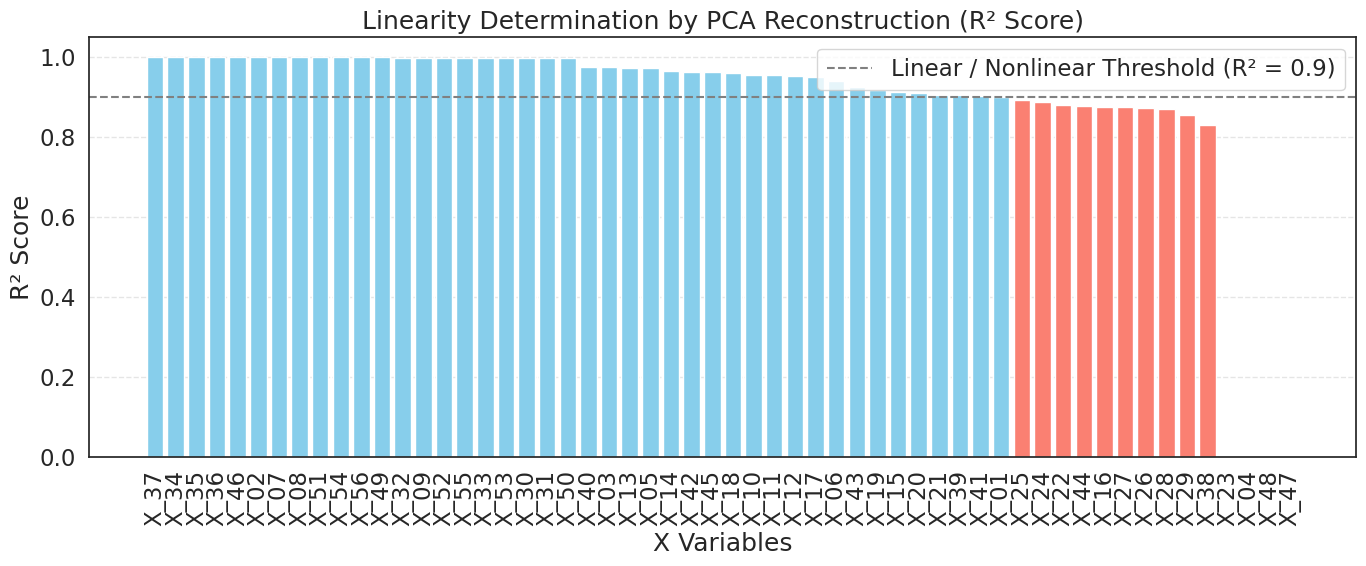

In [ ]:
import matplotlib.pyplot as plt

# 9. Visualization (English version)
plt.figure(figsize=(14, 6))
colors = r2_df['선형 여부'].map({'선형': 'skyblue', '비선형': 'salmon'})
plt.bar(r2_df['X 변수'], r2_df['R^2 점수'], color=colors)
plt.axhline(y=0.9, color='gray', linestyle='--', label='Linear / Nonlinear Threshold (R² = 0.9)')
plt.title('Linearity Determination by PCA Reconstruction (R² Score)')
plt.ylabel('R² Score')
plt.xlabel('X Variables')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 선형 변수 출력
print("✅ 선형 데이터로 분류된 X 변수 목록:")
for var in linear_vars:
    print(f" - {var}")

print("\n⚠ 비선형 데이터로 분류된 X 변수 목록:")
for var in nonlinear_vars:
    print(f" - {var}")
X_linear = train_df[linear_vars].copy()

X_nonlinear = train_df[nonlinear_vars].copy()


print(f"✅ Number of linear X variables: {X_linear.shape[1]}")

# 변수 목록 확인
print("📌 Linear X variables:")
print(X_linear.columns.tolist())


print(f"✅ Number of nonlinear X variables: {X_nonlinear.shape[1]}")

# 변수 목록 확인
print("📌 Noninear X variables:")
print(X_nonlinear.columns.tolist())

✅ 선형 데이터로 분류된 X 변수 목록:
 - X_01
 - X_02
 - X_03
 - X_05
 - X_06
 - X_07
 - X_08
 - X_09
 - X_10
 - X_11
 - X_12
 - X_13
 - X_14
 - X_15
 - X_17
 - X_18
 - X_19
 - X_20
 - X_21
 - X_30
 - X_31
 - X_32
 - X_33
 - X_34
 - X_35
 - X_36
 - X_37
 - X_39
 - X_40
 - X_41
 - X_42
 - X_43
 - X_45
 - X_46
 - X_49
 - X_50
 - X_51
 - X_52
 - X_53
 - X_54
 - X_55
 - X_56

⚠ 비선형 데이터로 분류된 X 변수 목록:
 - X_04
 - X_16
 - X_22
 - X_23
 - X_24
 - X_25
 - X_26
 - X_27
 - X_28
 - X_29
 - X_38
 - X_44
 - X_47
 - X_48
✅ Number of linear X variables: 42
📌 Linear X variables:
['X_01', 'X_02', 'X_03', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_45', 'X_46', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56']
✅ Number of nonlinear X variables: 14
📌 Noninear X variables:
['X_04', 'X_16', 'X_22', 'X_23', 'X_24', 'X_25',

###PCA 선형데이터 차원축소

In [ ]:

#  GPU 사용 여부 감지 함수 (선택사항)
import subprocess
def detect_gpu():
    try:
        subprocess.run(['nvidia-smi'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print(' GPU detected!')
        return True
    except Exception:
        print('⚠ No GPU detected.')
        return False

USE_GPU = detect_gpu()

#  도메인 기반 파생변수 생성 함수
def create_features(df):
    df = df.copy()
    if 'X_03' in df.columns and 'X_07' in df.columns:
        df['X_weight_area_ratio'] = df['X_03'] / (df['X_07'] + 1e-6)
    if all(f'X_{i}' in df.columns for i in range(41, 45)):
        radoms = [f'X_{i}' for i in range(41, 45)]
        df['X_radom_diff'] = df[radoms].max(axis=1) - df[radoms].min(axis=1)
        df['X_radom_std'] = df[radoms].std(axis=1)
    if all(col in df.columns for col in ['X_07', 'X_08', 'X_09']):
        df['X_total_area'] = df[['X_07', 'X_08', 'X_09']].sum(axis=1)
    if all(col in df.columns for col in ['X_01', 'X_02', 'X_05', 'X_06']):
        df['X_total_pressure'] = df[['X_01', 'X_02', 'X_05', 'X_06']].sum(axis=1)
    return df

#  제외할 변수와 그룹 지정
#excluded_vars = {'X_47', 'X_48', 'X_11', 'X_04', 'X_23', 'X_02', 'X_10'}
original_groups = {
    'material_weight': ['X_03', 'X_10', 'X_11'],
    'material_area': ['X_07', 'X_08', 'X_09'],
    'pass_fail_checks': ['X_04', 'X_23', 'X_47', 'X_48'],
    'antenna_pad_position': ['X_14', 'X_15', 'X_16', 'X_17', 'X_18'],
    'screw_depth_per_screw': ['X_19', 'X_20', 'X_21', 'X_22'],
    'screw_depth_per_number': ['X_30', 'X_31', 'X_32', 'X_33'],
    'connector_pin_size': ['X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29'],
    'housing_pcb_fit': ['X_38', 'X_39', 'X_40'],
    'radom_size': ['X_41', 'X_42', 'X_43', 'X_44'],
    'smt_solder': ['X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56'],
    'misc': ['X_12', 'X_13', 'X_45', 'X_46', 'X_49']
}
group_pca_models = {}

def run_pca_on_linear_data(train_df, linear_vars):
    X_raw = train_df[linear_vars].drop(columns=p_remove_x, errors='ignore')
    X_raw = create_features(X_raw)

    pca_results = pd.DataFrame(index=X_raw.index)

    for group_name, original_cols in original_groups.items():
        # 이 그룹에서 linear_vars에 포함된 컬럼만 유지
        cols = [col for col in original_cols if col in X_raw.columns and col in linear_vars]
        if not cols:
            continue
        scaler = StandardScaler()
        scaled = scaler.fit_transform(X_raw[cols])
        if scaled.shape[1] == 1:
            pca_component = scaled
            group_pca_models[group_name] = (scaler, None)
        else:
            pca = PCA(n_components=0.95)
            pca_component = pca.fit_transform(scaled)
            group_pca_models[group_name] = (scaler, pca)
        pca_cols = [f"{group_name}_PC{i+1}" for i in range(pca_component.shape[1])]
        pca_df = pd.DataFrame(pca_component, columns=pca_cols, index=X_raw.index)
        pca_results = pd.concat([pca_results, pca_df], axis=1)

    return pca_results




 GPU detected!


In [ ]:
# 선형 변수 기반 PCA 수행
linear_pca_df = run_pca_on_linear_data(train_df, linear_vars)

# 결과 확인 (앞부분만)
print(linear_pca_df)


       material_weight_PC1  material_area_PC1  material_area_PC2  \
0                -0.263313          -0.540211           0.043143   
1                -0.709820          -0.427373          -0.086596   
2                -0.923366          -0.686363           0.037765   
3                -0.243900          -0.478419           0.008042   
4                -1.020433          -0.360666           0.069599   
...                    ...                ...                ...   
39602            -1.272806          -1.027289           0.289680   
39603            -1.175739          -0.676165           0.086495   
39604            -0.806886           0.094329          -0.011917   
39605            -1.001020          -0.678490           0.247546   
39606            -0.612753          -0.685105           0.230337   

       material_area_PC3  antenna_pad_position_PC1  antenna_pad_position_PC2  \
0              -0.116031                 -0.254330                  0.535873   
1              -0.22989

####PCA 차원축소 시각화(설명력 그래프)

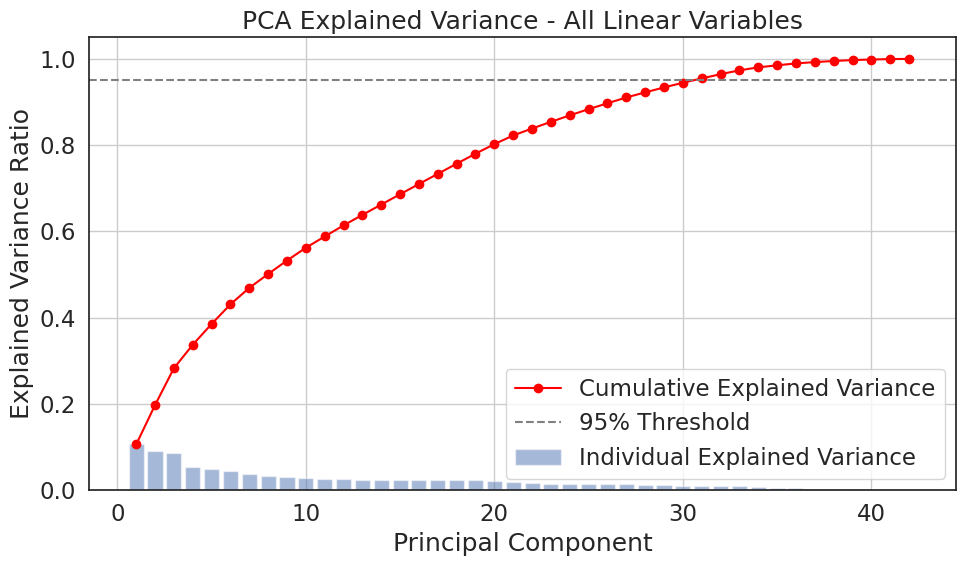

✅ 선형 변수 전체에 대해 95% 누적 설명력 달성에 필요한 주성분 수: 31개


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 선형 변수 전체 선택
X_linear_full = train_df[linear_vars].copy()

# 2. 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_linear_full)

# 3. PCA 전체 적용 (전체 주성분 수만큼)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# 4. 설명력 시각화
explained_var = pca_full.explained_variance_ratio_
cumulative_var = explained_var.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.5, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', color='red', label='Cumulative Explained Variance')

plt.axhline(y=0.95, color='gray', linestyle='--', label='95% Threshold')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance - All Linear Variables')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 누적 설명력 수치 출력
print(f"✅ 선형 변수 전체에 대해 95% 누적 설명력 달성에 필요한 주성분 수: {(cumulative_var < 0.95).sum() + 1}개")


###UMAP 비선형 데이터 차원축소

In [ ]:

# 1. 비선형 변수 스케일링
scaler = StandardScaler()
X_nonlinear_scaled = scaler.fit_transform(X_nonlinear)

# 2. UMAP 적용 (예: 3차원 축소)
umap = UMAP(n_components=3, random_state=42)
X_umap = umap.fit_transform(X_nonlinear_scaled)

# 3. 결과를 DataFrame으로 변환
umap_cols = ['UMAP1', 'UMAP2', 'UMAP3']
X_umap_df = pd.DataFrame(X_umap, columns=umap_cols, index=X_nonlinear.index)

# 4. 결과 확인
print("✅ UMAP 차원 축소 완료! 결과 shape:", X_umap_df.shape)
display(X_umap_df.head())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ UMAP 차원 축소 완료! 결과 shape: (39607, 3)


,UMAP1,UMAP2,UMAP3
0,4.551368,2.354303,2.789028
1,4.512050,2.118868,3.564504
2,4.653111,2.451304,2.823015
3,7.029498,8.937583,3.118620
4,4.919108,1.436931,4.189311


In [ ]:
# 두 차원 축소 결과를 병합
combined_dim_df = pd.concat([linear_pca_df, X_umap_df], axis=1)

# 확인
print("📦 결합된 차원 축소 결과 shape:", combined_dim_df.shape)
display(combined_dim_df.head())


📦 결합된 차원 축소 결과 shape: (39607, 30)


,material_weight_PC1,material_area_PC1,material_area_PC2,material_area_PC3,antenna_pad_position_PC1,antenna_pad_position_PC2,screw_depth_per_screw_PC1,screw_depth_per_screw_PC2,screw_depth_per_number_PC1,screw_depth_per_number_PC2,...,smt_solder_PC4,smt_solder_PC5,smt_solder_PC6,smt_solder_PC7,misc_PC1,misc_PC2,misc_PC3,UMAP1,UMAP2,UMAP3
0,-0.263313,-0.540211,0.043143,-0.116031,-0.254330,0.535873,-1.409873,0.750921,5.049326,-1.593397,...,-0.437104,1.355708,0.978502,0.585392,-2.090433,-0.834315,-0.100670,4.551368,2.354303,2.789028
1,-0.709820,-0.427373,-0.086596,-0.229898,-1.686435,1.109722,-3.306899,1.279213,4.416075,-2.036233,...,-0.274580,0.807530,-0.755503,1.012164,-0.794032,-0.807729,1.199545,4.512050,2.118868,3.564504
2,-0.923366,-0.686363,0.037765,0.311220,-0.891744,0.451033,-2.732395,0.158381,4.809094,-1.941366,...,-0.979626,0.709950,0.155814,0.465778,-0.606545,-0.660268,-0.280469,4.653111,2.451304,2.823015
3,-0.243900,-0.478419,0.008042,0.164206,-2.106298,1.204880,-2.777362,-0.148426,4.579633,-1.819798,...,0.054460,-0.213452,-0.210450,-0.852038,-3.259639,-0.261591,0.446092,7.029498,8.937583,3.118620
4,-1.020433,-0.360666,0.069599,-0.034131,-1.724078,0.569896,-2.634256,0.422023,5.486965,-1.328374,...,-0.516951,2.044355,0.011719,-0.739871,-1.210061,-0.653460,-0.325091,4.919108,1.436931,4.189311


####UMAP 차원축소 시각화

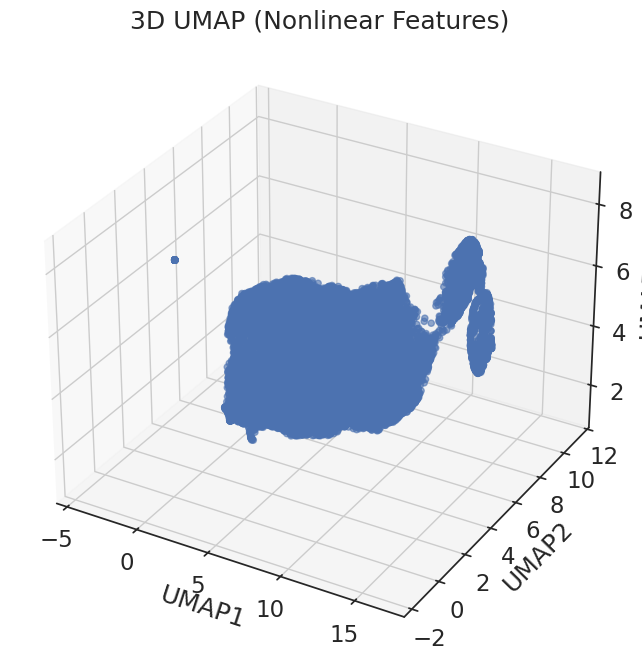

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_umap_df['UMAP1'],
    X_umap_df['UMAP2'],
    X_umap_df['UMAP3'],
    alpha=0.6
)

ax.set_title("3D UMAP (Nonlinear Features)")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")

plt.tight_layout()
plt.show()



###테스트 데이터셋에 차원축소 적용

####PCA 차원축소 테스트 적용

In [ ]:
def transform_pca_on_test_data(test_df, linear_vars, p_remove_x, original_groups, group_pca_models):
    X_raw = test_df[linear_vars].drop(columns=p_remove_x, errors='ignore')
    X_raw = create_features(X_raw)

    pca_results = pd.DataFrame(index=X_raw.index)

    for group_name, original_cols in original_groups.items():
        cols = [col for col in original_cols if col in X_raw.columns and col in linear_vars]
        if not cols:
            continue

        scaler, pca = group_pca_models[group_name]
        X_scaled = scaler.transform(X_raw[cols])

        if pca is None:
            X_pca = X_scaled
        else:
            X_pca = pca.transform(X_scaled)

        pca_cols = [f"{group_name}_PC{i+1}" for i in range(X_pca.shape[1])]
        pca_df = pd.DataFrame(X_pca, columns=pca_cols, index=X_raw.index)
        pca_results = pd.concat([pca_results, pca_df], axis=1)

    return pca_results



####UMAP 차원축소 테스트 적용

In [ ]:
# 비선형 변수 추출
X_test_nonlinear = test_df[nonlinear_vars]

# UMAP용 스케일링
X_test_nonlinear_scaled = scaler.transform(X_test_nonlinear)

# UMAP 변환
X_test_umap = umap.transform(X_test_nonlinear_scaled)

# 결과를 DataFrame으로
X_test_umap_df = pd.DataFrame(X_test_umap, columns=umap_cols, index=test_df.index)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


####통합 테스트 차원축소 적용

In [ ]:
# 선형 차원축소 결과
X_test_linear_pca_df = transform_pca_on_test_data(
    test_df, linear_vars, p_remove_x, original_groups, group_pca_models
)

# UMAP 결과는 위에서 만든 X_test_umap_df

# 최종 결합
X_test_final_df = pd.concat([X_test_linear_pca_df, X_test_umap_df], axis=1)

print("✅ Test 차원축소 완료! 최종 shape:", X_test_final_df.shape)
display(X_test_final_df.head())


✅ Test 차원축소 완료! 최종 shape: (39608, 30)


,material_weight_PC1,material_area_PC1,material_area_PC2,material_area_PC3,antenna_pad_position_PC1,antenna_pad_position_PC2,screw_depth_per_screw_PC1,screw_depth_per_screw_PC2,screw_depth_per_number_PC1,screw_depth_per_number_PC2,...,smt_solder_PC4,smt_solder_PC5,smt_solder_PC6,smt_solder_PC7,misc_PC1,misc_PC2,misc_PC3,UMAP1,UMAP2,UMAP3
0,1.522712,-0.459941,0.169069,-0.196267,0.982856,0.165727,0.887916,0.927228,-1.115032,-0.181223,...,-1.405223,0.861641,0.661703,0.525166,-0.291471,0.055754,0.084752,4.960541,-0.248093,4.355228
1,0.105540,0.206330,-0.291942,-0.497524,-0.059410,0.332169,0.675559,0.838873,-1.003599,0.293418,...,-1.431567,0.179637,0.550383,1.122416,-1.173696,0.020490,0.317417,8.846463,1.120879,3.870606
2,0.027887,0.245458,0.011139,0.017829,-1.273964,1.086017,-1.936140,0.554963,5.285138,-2.067297,...,-1.542447,-1.138515,-0.372752,0.476629,0.263234,-0.401382,3.405279,5.044259,-0.043093,4.146603
3,-0.573926,0.252321,-0.301396,-0.631066,-1.724078,0.569896,-0.293022,-0.612883,5.429129,-0.902563,...,-1.115845,0.497014,-0.087973,1.032231,-0.476812,-0.260336,1.555217,5.545982,5.927404,4.108027
4,-0.418620,-0.361273,0.069886,-0.240966,0.090249,-0.638936,-1.048955,0.782123,4.856477,-1.602026,...,-0.728795,0.054981,-0.964720,0.954747,0.879473,-0.653547,-0.469743,7.897600,2.142787,5.641973


In [ ]:
def plot_overall_pca_explained_variance(pca_combined_df):
    # 1. 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(pca_combined_df)

    # 2. PCA 적용
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # 3. 누적 분산 계산
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    # 4. 그래프 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o')
    plt.axhline(y=0.95, color='red', linestyle='--', label='95% threshold')
    plt.axhline(y=0.99, color='green', linestyle='--', label='99% threshold')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Overall Cumulative Explained Variance (All PCA Features)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

###차원축소 완료된 데이터 프레임

In [ ]:
print(combined_dim_df)

       material_weight_PC1  material_area_PC1  material_area_PC2  \
0                -0.263313          -0.540211           0.043143   
1                -0.709820          -0.427373          -0.086596   
2                -0.923366          -0.686363           0.037765   
3                -0.243900          -0.478419           0.008042   
4                -1.020433          -0.360666           0.069599   
...                    ...                ...                ...   
39602            -1.272806          -1.027289           0.289680   
39603            -1.175739          -0.676165           0.086495   
39604            -0.806886           0.094329          -0.011917   
39605            -1.001020          -0.678490           0.247546   
39606            -0.612753          -0.685105           0.230337   

       material_area_PC3  antenna_pad_position_PC1  antenna_pad_position_PC2  \
0              -0.116031                 -0.254330                  0.535873   
1              -0.22989

# 일반전처리

# 일반전처리

- 이상치 비율에 따라 자동 전략 추가한 코드

1.   clip : 이상치 비율 1~3%
2.   mean : 이상치 비율 3~7%
3.   median : 이상치 비율 7% 이상
4.   none : 이상치 거의 없음


In [ ]:
###이상치 비율계산해서 각 x데이터 별 다르게 추가
#위에 다 돌리면 3,4줄 삭제 가능
X = train_df[x_cols].copy()
Y = train_df[y_cols].copy()

# === 1. 자동 이상치 전략 함수 정의 ===
def auto_outlier_strategy(df):
    df = df.copy()
    result = pd.DataFrame()

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = (df[col] < lower) | (df[col] > upper)
        outlier_ratio = outliers.sum() / len(df) * 100

        if outlier_ratio < 1:
            strategy = 'none'
        elif outlier_ratio < 3:
            strategy = 'clip'
            df[col] = df[col].clip(lower, upper)
        elif outlier_ratio < 7:
            strategy = 'mean'
            df.loc[outliers, col] = np.nan
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            strategy = 'median'
            df.loc[outliers, col] = np.nan
            df[col].fillna(df[col].median(), inplace=True)

        result[col] = df[col]
        print(f"{col}: 이상치 비율 = {outlier_ratio:.2f}%, 전략 = {strategy}")

    return result

# === 2. 전처리 적용 ===
X_cleaned = auto_outlier_strategy(X)

# === 3. 스케일링 ===
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_cleaned), columns=X_cleaned.columns)

# === 4. VIF 제거 ===
def calculate_vif(df):
    vif_df = pd.DataFrame()
    vif_df["feature"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_df

X_vif = X_scaled.copy()
while True:
    vif = calculate_vif(X_vif)
    if vif["VIF"].max() < 10:
        break
    to_drop = vif.sort_values("VIF", ascending=False).iloc[0]["feature"]
    X_vif = X_vif.drop(columns=[to_drop])

# === 5. 데이터 분할 ===
X_train, X_val, y_train, y_val = train_test_split(X_vif, Y, test_size=0.2, random_state=42)

# === 6. NRMSE 평가 함수 ===
def evaluate_nrmse(X_tr, X_va, y_tr, y_va):
    nrmse_list = []
    for y in y_cols:
        model = LGBMRegressor(random_state=42)
        model.fit(X_tr, y_tr[y])
        pred = model.predict(X_va)
        rmse = np.sqrt(mean_squared_error(y_va[y], pred))
        nrmse = rmse / (y_va[y].max() - y_va[y].min())
        nrmse_list.append(nrmse)
    return np.mean(nrmse_list)

# === 7. 성능 평가 ===
nrmse_result = evaluate_nrmse(X_train, X_val, y_train, y_val)
print(f"\n✅ 자동 이상치 전략 처리 후 평균 NRMSE: {nrmse_result:.4f}")


#전처리 전/후 boxplot 시각화 비교
1. 이상치 감소 확인
- 예) X_09, X_49, X_53 같은 변수는 기존에 큰 이상치가 있었는데 보간 후 중앙값 부근으로 안정화됨

- X_30, X_31, X_38, X_39 같이 이상치 비율이 높았던 변수도 훨씬 더 좁은 분포로 변환

3. 중앙값과 사분위 범위 유지
- 대부분의 변수에서 이상치만 제거되었고, 데이터의 중심(중앙값)은 크게 변하지 않음 → 바람직한 처리

4. 일부 변수는 변화 없음
- 예) X_04, X_23, X_47, X_48 → 원래 이상치가 거의 없어서 변화가 없음 → 이 역시 정상

In [ ]:
###전처리 효과 전/후 분석 시각화 추가
def compare_boxplots(before_df, after_df, cols=None, cols_per_row=7):
    if cols is None:
        cols = before_df.columns.tolist()

    total = len(cols)
    n_rows = (total + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(cols_per_row * 4, n_rows * 4))

    for idx, col in enumerate(cols):
        plt.subplot(n_rows, cols_per_row, idx + 1)
        sns.boxplot(data=pd.DataFrame({f'Before ({col})': before_df[col], f'After ({col})': after_df[col]}))
        plt.title(col)

    plt.tight_layout()
    plt.show()

# ✅ 전처리 전후 X 데이터 비교 시각화
compare_boxplots(X, X_cleaned)

shap처리 데이터 사용

In [ ]:
'''plot_vif_comparison(X_scaled, X_vif)

# === VIF 제거 전 ===
corr_before = X_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_before, cmap='coolwarm', center=0, annot=False)
plt.title('VIF 제거 전 X 변수 상관관계')
plt.show()

# === VIF 제거 후 ===
corr_after = X_vif.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_after, cmap='coolwarm', center=0, annot=False)
plt.title('VIF 제거 후 X 변수 상관관계')
plt.show()'''

In [ ]:
print(X_vif) #일반전처리 = vif 변수

In [ ]:
print(X_scaled) #일반전처리만 진행한(vif X)변수

# 모델(성능평가 포함)

모델 정리 :
- 일반전처리(shap+vif+평균보간)

In [ ]:
import platform
platform.platform()

In [ ]:
!cat /etc/issue.net

In [ ]:
!python --version

###옵튜나를 통한 하이퍼파라미터 조정

In [ ]:
'''
USE_OPTUNA_XGB = True
USE_OPTUNA_LGBM = True
USE_OPTUNA_CAT = False
import optuna
from sklearn.model_selection import KFold
import numpy as np

##lightGBM
from lightgbm import LGBMRegressor

def objective_lgbm(trial, X, y):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'max_depth': trial.suggest_int('max_depth', 5, 16),
        'num_leaves': trial.suggest_int('num_leaves', 32, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'random_state': 42
    }

    model = MyMultiOutputRegressor_LGBM(LGBMRegressor(**param))
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for tr_idx, val_idx in kf.split(X):
        model.fit(X.iloc[tr_idx], y.iloc[tr_idx])
        preds = model.predict(X.iloc[val_idx])
        scores.append(lg_nrmse(y.iloc[val_idx].values, preds))

    return np.mean(scores)

# 실행
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(lambda trial: objective_lgbm(trial, data_train_X, data_train_y.iloc[:, :-1]), n_trials=10)

best_lgbm_params = study_lgbm.best_params
best_lgbm_params['random_state'] = 42
print("✅ Best LightGBM Params:", best_lgbm_params)

##XGBoost
from xgboost import XGBRegressor

def objective_xgb(trial, X, y):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.05),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 5),
        'random_state': 42,
        'objective': 'reg:squarederror'
    }

    model = MyMultiOutputRegressor_XGB(XGBRegressor(**param))
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for tr_idx, val_idx in kf.split(X):
        model.fit(X.iloc[tr_idx], y.iloc[tr_idx])
        preds = model.predict(X.iloc[val_idx])
        scores.append(lg_nrmse(y.iloc[val_idx].values, preds))

    return np.mean(scores)

# 실행
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(lambda trial: objective_xgb(trial, data_train_X, data_train_y.iloc[:, :-1]), n_trials=10)

best_xgb_params = study_xgb.best_params
best_xgb_params['random_state'] = 42
best_xgb_params['objective'] = 'reg:squarederror'
print("✅ Best XGBoost Params:", best_xgb_params)
'''

### 모델 -  차원축소 데이터 사용

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.base import clone


warnings.filterwarnings('ignore')

# ✅ Custom MultiOutput wrapper for LGBM
#from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from joblib import delayed  # ✅ 정상 경로

from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputRegressor
import lightgbm

class MyMultiOutputRegressor_LGBM(MultiOutputRegressor):
    def fit(self, X, y, sample_weight=None, **fit_params):
        self.estimators_ = []
        X, y = self._validate_data(X, y, force_all_finite=False, multi_output=True, accept_sparse=True)

        eval_set = fit_params.pop("eval_set", None)

        for i in range(y.shape[1]):
            estimator = clone(self.estimator)
            individual_params = fit_params.copy()

            if eval_set is not None:
                X_val, y_val = eval_set[0]
                individual_params["eval_set"] = [(X_test, Y_test.iloc[:, i])],

                individual_params["callbacks"] = [lightgbm.early_stopping(200)]

            estimator.fit(X, y[:, i], sample_weight=sample_weight, **individual_params)
            self.estimators_.append(estimator)
        return self

    def save(self, path):
        os.makedirs(path, exist_ok=True)
        for i, estimator in enumerate(self.estimators_):
            estimator.booster_.save_model(f"{path}/lgbm_{i}.txt")

    def load(self, path):
        self.estimators_ = []
        i = 0
        while True:
            file = os.path.join(path, f"lgbm_{i}.txt")
            if not os.path.exists(file):
                break
            booster = lightgbm.Booster(model_file=file)
            self.estimators_.append(booster)
            i += 1


    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            estimator.booster_.save_model(save_path)

    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.txt'.format(path, chain_idx)
            self.estimators_[chain_idx] = lightgbm.Booster(save_path)

# ✅ Custom MultiOutput wrapper for XGB
#from sklearn.utils.validation import _check_fit_params
from sklearn.base import is_classifier
from joblib import delayed  # ✅ 정상 경로

from joblib import Parallel
from sklearn.multioutput import _fit_estimator
from sklearn.multioutput import MultiOutputRegressor
import xgboost
import pickle

class MyMultiOutputRegressor_XGB(MultiOutputRegressor):
    def fit(self, X, y, sample_weight=None, **fit_params):
        self.estimators_ = []
        X, y = self._validate_data(X, y, force_all_finite=False, multi_output=True, accept_sparse=True)

        eval_set = fit_params.pop("eval_set", None)

        for i in range(y.shape[1]):
            estimator = clone(self.estimator)
            individual_params = fit_params.copy()
            if eval_set is not None:
                X_val, y_val = eval_set[0]
                individual_params["eval_set"] = [(X_test, Y_test.iloc[:, i])],
                individual_params["early_stopping_rounds"] = 100
                individual_params["verbose"] = 100
            estimator.fit(X, y[:, i], sample_weight=sample_weight, **individual_params)
            self.estimators_.append(estimator)
        return self

    def save(self, path):
        os.makedirs(path, exist_ok=True)
        for i, estimator in enumerate(self.estimators_):
            with open(f"{path}/xgb_{i}.pkl", "wb") as f:
                pickle.dump(estimator, f)

    def load(self, path):
        self.estimators_ = []
        i = 0
        while True:
            file = os.path.join(path, f"xgb_{i}.pkl")
            if not os.path.exists(file):
                break
            with open(file, "rb") as f:
                self.estimators_.append(pickle.load(f))
            i += 1


    # model save
    def save(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            pickle.dump(estimator, open(save_path, "wb"))

    # model load
    def load(self, path):
        for chain_idx, estimator in enumerate(self.estimators_):
            save_path = '{}_{}.dat'.format(path, chain_idx)
            model = pickle.load(open(save_path, "rb"))


# ✅ NRMSE 평가 함수
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(14): # ignore 'ID'
        rmse = mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:7]) + 1.0 * np.sum(all_nrmse[7:14])
    return score

# ✅ 데이터 준비 (차원축소된 데이터)
data_train_X = pd.DataFrame(combined_dim_df)  # 통합 차원축소 train data
X_test = X_test_final_df                      # 통합 차원축소 test data
label_column = Y['Y_01']
data_train_y = Y.assign(label=pd.qcut(label_column, q=5, labels=False))

# ✅ 교차검증 준비
n_splits = 6
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
os.makedirs('./model', exist_ok=True)

fold_target_pred = []
fold_score = []

n = 0
for train_idx, valid_idx in skf.split(data_train_X, data_train_y['label']):
    n += 1
    print(f"\n========== Fold {n} ==========")

    val_pred_name = []  # 각 fold마다 초기화
    val_pred = []
    target_pred = []

    X_train, X_valid = data_train_X.iloc[train_idx], data_train_X.iloc[valid_idx]
    y_train, y_valid = data_train_y.iloc[train_idx, :-1], data_train_y.iloc[valid_idx, :-1]

In [ ]:


start_time_cat = time.time()
model_cat = CatBoostRegressor(
    verbose=200,
    learning_rate=0.02,
    random_seed=42,
    iterations=5000,
    loss_function='MultiRMSE',
    od_wait=200,
    depth=9
)
model_cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))
end_time_cat = time.time()

# model_cat 저장
cat_path = './model/cat_{}'.format(n)
model_cat.save_model(cat_path)

# 예측 저장
val_pred_name.append("CatBoostRegressor")
val_pred.append(model_cat.predict(X_valid))
target_pred.append(model_cat.predict(X_test))

# LGBM 모델
start_time_lgb = time.time()
model_lgbm = MyMultiOutputRegressor_LGBM(
    LGBMRegressor(
        n_estimators=2000,
        learning_rate=0.01,
        max_depth=16,
        min_child_samples=56,
        subsample=0.4,
        num_leaves=160,
        random_state=42,
        n_jobs=8
    )
)
fit_params_lgbm = {
    "eval_set": [(X_valid, y_valid)],  # ✅ 올바른 pandas 방식

    "eval_metric": "rmse"
}
model_lgbm.fit(X_train, y_train, **fit_params_lgbm)
end_time_lgb = time.time()

val_pred_name.append("LGBMRegressor")
val_pred.append(model_lgbm.predict(X_valid))
target_pred.append(model_lgbm.predict(X_test))

# model_lgbm 저장
lgbm_path = './model/lgbm_{}'.format(n)
model_lgbm.save(lgbm_path)

# XGBoost 모델
start_time_xgb = time.time()
model_xgb = MyMultiOutputRegressor_XGB(
    XGBRegressor(
        objective="reg:squarederror",
        n_estimators=3000,
        random_state=42,
        eval_metric="rmse",
        learning_rate=0.006,
        subsample=0.75,
        colsample_bytree=0.86,
        max_depth=9,
        tree_method='gpu_hist',
        gpu_id=0
    )
)
fit_params_xgb = {
    "eval_set": [(X_valid, y_valid)]
}
model_xgb.fit(X_train, y_train, **fit_params_xgb)
end_time_xgb = time.time()

val_pred_name.append("XGBRegressor")
val_pred.append(model_xgb.predict(X_valid))
target_pred.append(model_xgb.predict(X_test))

# model_xgb 저장
xgb_path = './model/xgb_{}'.format(n)
model_xgb.save(xgb_path)

# 평균 validation 예측
preds = np.mean(val_pred, axis=0)

# 평균 test 예측
target_preds = np.mean(target_pred, axis=0)
fold_target_pred.append(target_preds)

# 결과 출력
print("========== fold %d ==========" % n)
for i in range(len(val_pred)):
    print("%s model nrmse : %0.4f" % (val_pred_name[i], lg_nrmse(y_valid, val_pred[i])))

avg_score = lg_nrmse(y_valid, preds)
print("CAT 코드 실행 시간: %10ds" % (end_time_cat - start_time_cat))
print("LGB 코드 실행 시간: %10ds" % (end_time_lgb - start_time_lgb))
print("XGB 코드 실행 시간: %10ds" % (end_time_xgb - start_time_xgb))
print("average model nrmse : %0.4f" % avg_score)
fold_score.append(avg_score)

# 전체 평균 점수 계산
total_score = np.mean(fold_score)

print("==============================")
print("Model Sum Average nrmse %0.4f" % total_score)


In [ ]:
'''

    ### CatBoost ###
    start_time_cat = time.time()
    model_cat = CatBoostRegressor(
        verbose=200, learning_rate=0.02, iterations=5000, loss_function='MultiRMSE',
        od_wait=200, depth=9, random_seed=42
    )
    model_cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))
    end_time_cat = time.time()
    val_pred_name.append("CatBoostRegressor")
    val_pred.append(model_cat.predict(X_valid))
    target_pred.append(model_cat.predict(X_test))
    model_cat.save_model(f'./model/cat_{n}')

    ### LGBM ###
    start_time_lgb = time.time()
    model_lgbm = MyMultiOutputRegressor_LGBM(LGBMRegressor(
    n_estimators=2000, learning_rate=0.01, max_depth=16,
    min_child_samples=56, subsample=0.4, num_leaves=160,
    random_state=42, n_jobs=8
    ))
# ✅ 수정: eval_set 제거
    model_lgbm.fit(X_train, y_train)
    end_time_lgb = time.time()

    val_pred_name.append("LGBMRegressor")
    val_pred.append(model_lgbm.predict(X_valid))
    target_pred.append(model_lgbm.predict(X_test))
    model_lgbm.save(f'./model/lgbm_{n}')

    ### XGBoost ###
    start_time_xgb = time.time()
    model_xgb = MyMultiOutputRegressor_XGB(XGBRegressor(
        objective="reg:squarederror", n_estimators=3000, random_state=42,
        eval_metric="rmse", learning_rate=0.006, subsample=0.75,
        colsample_bytree=0.86, max_depth=9, tree_method='gpu_hist', gpu_id=0
    ))
    model_xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    end_time_xgb = time.time()
    val_pred_name.append("XGBRegressor")
    val_pred.append(model_xgb.predict(X_valid))
    target_pred.append(model_xgb.predict(X_test))
    model_xgb.save(f'./model/xgb_{n}')

    ### 평균 예측 ###
    preds = np.mean(val_pred, axis=0)
    target_preds = np.mean(target_pred, axis=0)
    fold_target_pred.append(target_preds)

    # 개별 및 앙상블 결과 출력
    print("========== Fold %d Results ==========" % n)
    for i in range(len(val_pred)):
        print("%s model NRMSE: %0.4f" % (val_pred_name[i], lg_nrmse(y_valid.values, val_pred[i])))
    print("CAT 실행 시간: %ds" % (end_time_cat - start_time_cat))
    print("LGB 실행 시간: %ds" % (end_time_lgb - start_time_lgb))
    print("XGB 실행 시간: %ds" % (end_time_xgb - start_time_xgb))
    avg_nrmse = lg_nrmse(y_valid.values, preds)
    print("앙상블 평균 NRMSE: %0.4f" % avg_nrmse)
    fold_score.append(avg_nrmse)

# ✅ 최종 결과
final_pred = np.mean(fold_target_pred, axis=0)
total_score = np.mean(fold_score)

print("\n==============================")
print("Model Sum Average NRMSE: %0.4f" % total_score)
'''

In [ ]:
# split 안 되는 원인 진단 코드 추가해보세요
print("NaN 존재 여부:", X_train.isnull().sum().sum())
print("X_train 평균:", X_train.mean().mean())
print("X_train std:", X_train.std().mean())
for i in range(y_train.shape[1]):
    print(f"y{i} 고유값 수:", y_train.iloc[:, i].nunique())


In [ ]:
'''warnings.filterwarnings('ignore')

#  GPU 감지
def detect_gpu():
    try:
        subprocess.run(['nvidia-smi'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print('✅ GPU detected! Using GPU mode for CatBoost.')
        return True
    except Exception:
        print('⚠ No GPU detected. Using CPU mode for CatBoost.')
        return False

USE_GPU = detect_gpu()



#  Stratified label 준비 (여기선 Y_01 사용)
data_train_X = pd.DataFrame(combined_dim_df) # pca데이터
label_column = Y['Y_01']
data_train_y = Y.assign(label=pd.qcut(label_column, q=5, labels=False))  # 5분위 구간화

n_splits = 6
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_target_pred = []
fold_score = []

os.makedirs('./model', exist_ok=True)

def lg_nrmse(gt, preds):
    all_nrmse = []
    for idx in range(14):
        rmse = np.sqrt(np.mean((gt[:, idx] - preds[:, idx]) ** 2))
        nrmse = rmse / np.mean(np.abs(gt[:, idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:7]) + 1.0 * np.sum(all_nrmse[7:14])
    return score

n = 0
for train_idx, valid_idx in skf.split(data_train_X, data_train_y['label']):
    n += 1
    print(f'========== Fold {n} =========')

    X_train, X_valid = data_train_X.iloc[train_idx], data_train_X.iloc[valid_idx]
    y_train, y_valid = data_train_y.iloc[train_idx, :-1], data_train_y.iloc[valid_idx, :-1]

    X_test = X_test_final_df  # PCA 처리된 test data

    val_pred = []
    target_pred = []

    start_time_cat = time.time()
    model_cat = CatBoostRegressor(verbose = 200,
                            learning_rate = 0.02,
                            random_seed = 42,
                            iterations = 5000,
                            loss_function='MultiRMSE',
                            #ignored_features = [8, 9, 31, 32, 33, 34, 45, 50, 51, 53, 54, 55],
                            od_wait = 200,
                            depth = 9)

    model_cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))
    end_time_cat = time.time()


    #model cat 저장
    cat_path = './model/cat_{}'.format(n)
    model_cat.save_model(cat_path)

    #model cat 불러오기
    #model_cat.load_model(cat_path)

    val_pred_name.append("CatBoostRegressor")  # 모델 이름 저장
    val_pred.append(model_cat.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_cat.predict(X_test)) # test set pred 결과 저장

    ### LGBM model
    start_time_lgb = time.time()
    model_lgbm = MyMultiOutputRegressor_LGBM(LGBMRegressor(n_estimators = 2000,
                                               learning_rate = 0.01,
                                               max_depth = 16,
                                               min_child_samples = 56,
                                               subsample = 0.4,
                                               num_leaves = 160,
                                               random_state = 42,
                                               n_jobs = 8))

    fit_params = dict(
        eval_set=[(X_valid, y_valid)],
        eval_metric = "rmse",
        )

    model_lgbm.fit(X_train, y_train, **fit_params)
    end_time_lgb = time.time()
    val_pred_name.append("LGBMRegressor")  # 모델 이름 저장
    val_pred.append(model_lgbm.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_lgbm.predict(X_test)) # test set pred 결과 저장

    #model lgbm 저장
    lgbm_path = './model/lgbm_{}'.format(n)
    model_lgbm.save(lgbm_path)

    #model lgbm 불러오기
    #model_lgbm.load(lgbm_path)

    ### XGB model
    start_time_xgb = time.time()
    model_xgb = MyMultiOutputRegressor_XGB(XGBRegressor(objective = "reg:squarederror",
                                                  n_estimators = 3000,
                                                  random_state = 42,
                                                  eval_metric = "rmse",
                                                  learning_rate=0.006,
                                                  subsample=0.75,
                                                  colsample_bytree = 0.86,
                                                  max_depth=9,
                                                  tree_method='gpu_hist',
                                                  gpu_id = 0))

    fit_params = dict(
        eval_set=[(X_valid, y_valid)],
        )

    model_xgb.fit(X_train, y_train, **fit_params)
    end_time_xgb = time.time()
    val_pred_name.append("XGBRegressor")  # 모델 이름 저장
    val_pred.append(model_xgb.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_xgb.predict(X_test)) # test set pred 결과 저장

    #model xgb 저장
    xgb_path = './model/xgb_{}'.format(n)
    model_xgb.save(xgb_path)

    #model xgb 불러오기
    #model_xgb.load(xgb_path)

    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    preds = preds/len(val_pred)

    ### average target pred ###
    target_preds = target_pred[0]
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    target_preds = target_preds/len(target_pred)
    fold_target_pred.append(target_preds) # append final target pred

    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model nrmse : %0.4f" %(val_pred_name[i], lg_nrmse(y_valid, val_pred[i])))

    print('CAT 코드 실행 시간: %10ds' % (end_time_cat - start_time_cat))
    print('LGB 코드 실행 시간: %10ds' % (end_time_lgb - start_time_lgb))
    print('XGB 코드 실행 시간: %10ds' % (end_time_xgb - start_time_xgb))
    print("average model nrmse : %0.4f" %(lg_nrmse(y_valid, preds)))
    fold_score.append(lg_nrmse(y_valid, preds))

total_score = fold_score[0]
for i in range(1, len(fold_score)):
    total_score += fold_score[i]

total_score = total_score/len(fold_score)

print("==============================")
print("Model Sum Average nrmse %0.4f" %(total_score))'''

###모델 - 일반전처리 데이터 사용

In [ ]:
'''final_X = X_vif             # 학습용 feature
label_column = Y['Y_01']
data_train_X = final_X
data_train_y = Y.assign(label=pd.qcut(label_column, q=5, labels=False))  # Stratified label

#test 데이터도 동일하게 전처리된 X_test_vif 사용
# ---------------------------------------------------------------
X_test = test_df[x_cols].copy()
X_test_cleaned = process_columnwise(X_test, strategy_map)  # 이상치 처리
X_test_scaled = pd.DataFrame(scaler.transform(X_test_cleaned), columns=X_test.columns)  # 스케일링
X_test_vif = X_test_scaled[X_vif.columns]  # 학습과 같은 컬럼만 선택
# ---------------------------------------------------------------
from sklearn.multioutput import MultiOutputRegressor
MyMultiOutputRegressor_LGBM = MultiOutputRegressor
from xgboost import XGBRegressor

MyMultiOutputRegressor_XGB = MultiOutputRegressor

warnings.filterwarnings('ignore')



n_splits = 2
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

fold_target_pred = []
fold_score = []

os.makedirs('./model', exist_ok=True)

def lg_nrmse(gt, preds):
    all_nrmse = []
    for idx in range(14):
        rmse = np.sqrt(np.mean((gt[:, idx] - preds[:, idx]) ** 2))
        nrmse = rmse / np.mean(np.abs(gt[:, idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:7]) + 1.0 * np.sum(all_nrmse[7:14])
    return score

n = 0
for train_idx, valid_idx in skf.split(data_train_X, data_train_y['label']):
    n += 1
    print(f'========== Fold {n} =========')

    X_train, X_valid = data_train_X.iloc[train_idx], data_train_X.iloc[valid_idx]
    y_train, y_valid = data_train_y.iloc[train_idx, :-1], data_train_y.iloc[valid_idx, :-1]

    X_test = X_test_vif   #  전처리된 test data

    val_pred = []
    target_pred = []

    start_time_cat = time.time()
    model_cat = CatBoostRegressor(verbose = 200,
                            learning_rate = 0.02,
                            random_seed = 42,
                            iterations = 5000,
                            loss_function='MultiRMSE',
                            #ignored_features = [8, 9, 31, 32, 33, 34, 45, 50, 51, 53, 54, 55],
                            od_wait = 200,
                            depth = 9)

    model_cat.fit(X_train, y_train, eval_set=(X_valid, y_valid))
    end_time_cat = time.time()


    #model cat 저장
    cat_path = './model/cat_{}'.format(n)
    model_cat.save_model(cat_path)

    #model cat 불러오기
    #model_cat.load_model(cat_path)

    val_pred_name.append("CatBoostRegressor")  # 모델 이름 저장
    val_pred.append(model_cat.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_cat.predict(X_test)) # test set pred 결과 저장

    ### LGBM model
    start_time_lgb = time.time()
    model_lgbm = MyMultiOutputRegressor_LGBM(LGBMRegressor(n_estimators = 2000,
                                               learning_rate = 0.01,
                                               max_depth = 16,
                                               min_child_samples = 56,
                                               subsample = 0.4,
                                               num_leaves = 160,
                                               random_state = 42,
                                               n_jobs = 8))

    fit_params = dict(
        eval_set=[(X_valid, y_valid)],
        eval_metric = "rmse",
        )

    model_lgbm.fit(X_train, y_train, **fit_params)
    end_time_lgb = time.time()
    val_pred_name.append("LGBMRegressor")  # 모델 이름 저장
    val_pred.append(model_lgbm.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_lgbm.predict(X_test)) # test set pred 결과 저장

    #model lgbm 저장
    lgbm_path = './model/lgbm_{}'.format(n)
    model_lgbm.save(lgbm_path)

    #model lgbm 불러오기
    #model_lgbm.load(lgbm_path)

    ### XGB model
    start_time_xgb = time.time()
    model_xgb = MyMultiOutputRegressor_XGB(XGBRegressor(objective = "reg:squarederror",
                                                  n_estimators = 3000,
                                                  random_state = 42,
                                                  eval_metric = "rmse",
                                                  learning_rate=0.006,
                                                  subsample=0.75,
                                                  colsample_bytree = 0.86,
                                                  max_depth=9,
                                                  tree_method='gpu_hist',
                                                  gpu_id = 0))

    fit_params = dict(
        eval_set=[(X_valid, y_valid)],
        )

    model_xgb.fit(X_train, y_train, **fit_params)
    end_time_xgb = time.time()
    val_pred_name.append("XGBRegressor")  # 모델 이름 저장
    val_pred.append(model_xgb.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model_xgb.predict(X_test)) # test set pred 결과 저장

    #model xgb 저장
    xgb_path = './model/xgb_{}'.format(n)
    model_xgb.save(xgb_path)

    #model xgb 불러오기
    #model_xgb.load(xgb_path)

    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    preds = preds/len(val_pred)

    ### average target pred ###
    target_preds = target_pred[0]
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    target_preds = target_preds/len(target_pred)
    fold_target_pred.append(target_preds) # append final target pred

    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model nrmse : %0.4f" %(val_pred_name[i], lg_nrmse(y_valid, val_pred[i])))

    print('CAT 코드 실행 시간: %10ds' % (end_time_cat - start_time_cat))
    print('LGB 코드 실행 시간: %10ds' % (end_time_lgb - start_time_lgb))
    print('XGB 코드 실행 시간: %10ds' % (end_time_xgb - start_time_xgb))
    print("average model nrmse : %0.4f" %(lg_nrmse(y_valid, preds)))
    fold_score.append(lg_nrmse(y_valid, preds))

total_score = fold_score[0]
for i in range(1, len(fold_score)):
    total_score += fold_score[i]

total_score = total_score/len(fold_score)

print("==============================")
print("Model Sum Average nrmse %0.4f" %(total_score))'''

일반전처리 한 데이터 사용

#제출용 코드ㅓ

In [ ]:
submission_path = '/content/drive/MyDrive/RIDAR/data/sample_submission.csv'
#이거 경로도 사람마다 수정하기 -현재 주연우 경로
sample_submission = pd.read_csv(submission_path)

# 2. final_pred 결과 채워넣기
# ID는 그대로 두고, Y_01 ~ Y_14 컬럼에 예측값 삽입
target_columns = [col for col in sample_submission.columns if col != 'ID']

for idx, col in enumerate(target_columns):
    sample_submission[col] = final_pred[:, idx]

# 3. 확인
print("✅ 최상위 5개 행 미리보기:")
display(sample_submission.head())

# 4. 저장
output_path = './final_pred.csv'
sample_submission.to_csv(output_path, index=False)
print(f"✅ '{output_path}' 파일로 저장 완료!")